# **0 - Import Data & Library**

### Library

In [ ]:
pip install catboost

In [ ]:
pip install pyod

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import random
from matplotlib.colors import cnames
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_predict, cross_validate, KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier, SGDClassifier, Perceptron
from sklearn.ensemble import (
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    StackingClassifier
)
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelSpreading
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
from pyod.models.knn import KNN
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Akses folder berbagi
shared_folder_path = '/content/drive/MyDrive/LOMBA/Data Quest DSI'

# Lihat file dalam folder
import os
print(os.listdir(shared_folder_path))

Mounted at /content/drive
['Data HIV.xlsx', 'Project Akhir SML']


In [ ]:
import zipfile
archieve = zipfile.ZipFile('/content/drive/MyDrive/LOMBA/Data Quest DSI/Data Quest Materials-20250518T125000Z-1-001.zip')
archieve.extractall()

### Data

In [ ]:
df_tr = pd.read_csv("/content/Data Quest Materials/training_dataset.csv") # data train
df_te = pd.read_csv("/content/Data Quest Materials/validation_set.csv") # data test

In [ ]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

In [ ]:
display(df_tr, df_te)

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,680377,32,teknisi,menikah,Diploma,no,yes,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,Kalimantan,0
22912,505429,30,mahasiswa,lajang,Diploma,no,no,no,telephone,sep,...,999,0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,Bali,0
22913,308952,29,manajer,lajang,SMA,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,NTT,0
22914,865813,52,entrepreneur,menikah,Tidak Tamat SD,unknown,yes,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,NTB,0


,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,51,pekerja kasar,menikah,Tidak Tamat SD,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,Kalimantan
5725,116371,30,pekerja kasar,menikah,SMP,no,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,Sulawesi
5726,773759,45,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,NTB
5727,612330,60,teknisi,menikah,Diploma,unknown,no,no,telephone,jul,...,15,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,Papua


# **1 - Exploratory Data Analysis**

### Struktur Data

In [ ]:
display(df_tr.info(), df_te.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

None

None

### Missing Value

In [ ]:
display(df_tr.isna().mean()*100, df_te.isna().mean()*100)

,0
customer_number,0.0
usia,0.0
pekerjaan,0.0
status_perkawinan,0.0
pendidikan,0.0
gagal_bayar_sebelumnya,0.0
pinjaman_rumah,0.0
pinjaman_pribadi,0.0
jenis_kontak,0.0
bulan_kontak_terakhir,0.0


,0
customer_number,0.0
usia,0.0
pekerjaan,0.0
status_perkawinan,0.0
pendidikan,0.0
gagal_bayar_sebelumnya,0.0
pinjaman_rumah,0.0
pinjaman_pribadi,0.0
jenis_kontak,0.0
bulan_kontak_terakhir,0.0


### Unique Value Variabel Kategorik

In [ ]:
# Buat dictionary: key = nama kolom, value = list nilai unik
unique_dict = {
    col: df_tr[col].unique().tolist()
    for col in df_tr.select_dtypes(include='object').columns
}

# Konversi dictionary jadi DataFrame
unique_df = pd.DataFrame(list(unique_dict.items()), columns=['Kolom', 'Unique Values'])

# Tampilkan
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
unique_df


,Kolom,Unique Values
0,pekerjaan,"[sosial media specialis, teknisi, pekerja kasar, manajer, asisten rumah tangga, mahasiswa, penyedia jasa, pemilik bisnis, entrepreneur, pengangguran, pensiunan, unknown]"
1,status_perkawinan,"[menikah, lajang, cerai, unknown]"
2,pendidikan,"[Pendidikan Tinggi, SMA, Tidak Tamat SD, SMP, Diploma, SD, unknown, TIDAK SEKOLAH]"
3,gagal_bayar_sebelumnya,"[no, unknown, yes]"
4,pinjaman_rumah,"[yes, no, unknown]"
5,pinjaman_pribadi,"[no, yes, unknown]"
6,jenis_kontak,"[cellular, telephone]"
7,bulan_kontak_terakhir,"[jul, nov, may, aug, oct, apr, jun, sep, mar, dec]"
8,hari_kontak_terakhir,"[fri, thu, wed, tue, mon]"
9,hasil_kampanye_sebelumnya,"[nonexistent, failure, success]"


In [ ]:
# Buat dictionary: key = nama kolom, value = list nilai unik
unique_dict = {
    col: df_te[col].unique().tolist()
    for col in df_te.select_dtypes(include='object').columns
}

# Konversi dictionary jadi DataFrame
unique_df = pd.DataFrame(list(unique_dict.items()), columns=['Kolom', 'Unique Values'])

# Tampilkan
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
unique_df


,Kolom,Unique Values
0,pekerjaan,"[penyedia jasa, teknisi, pekerja kasar, pengangguran, sosial media specialis, pensiunan, asisten rumah tangga, manajer, mahasiswa, entrepreneur, pemilik bisnis, unknown]"
1,status_perkawinan,"[menikah, lajang, cerai, unknown]"
2,pendidikan,"[SMA, Diploma, SMP, Tidak Tamat SD, SD, Pendidikan Tinggi, unknown, TIDAK SEKOLAH]"
3,gagal_bayar_sebelumnya,"[no, unknown]"
4,pinjaman_rumah,"[yes, no, unknown]"
5,pinjaman_pribadi,"[yes, no, unknown]"
6,jenis_kontak,"[cellular, telephone]"
7,bulan_kontak_terakhir,"[jul, may, jun, apr, nov, aug, mar, dec, sep, oct]"
8,hari_kontak_terakhir,"[mon, thu, wed, tue, fri]"
9,hasil_kampanye_sebelumnya,"[nonexistent, failure, success]"


### Statistik Deskriptif Variabel Numerik

In [ ]:
numeric_cols = df_te.select_dtypes(include=['int64', 'float64']).columns
df_te[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_number,5729.0,548493.630826,258992.541542,100423.000,323527.000,552893.000,772131.000,999897.000
usia,5729.0,39.852679,10.348971,18.000,32.000,38.000,46.000,98.000
jumlah_kontak_kampanye_ini,5729.0,2.545470,2.618704,1.000,1.000,2.000,3.000,43.000
hari_sejak_kontak_sebelumnya,5729.0,964.329377,182.310129,0.000,999.000,999.000,999.000,999.000
jumlah_kontak_sebelumnya,5729.0,0.162157,0.471306,0.000,0.000,0.000,0.000,5.000
tingkat_variasi_pekerjaan,5729.0,0.096003,1.565580,-3.400,-1.800,1.100,1.400,1.400
indeks_harga_konsumen,5729.0,93.571413,0.576929,92.201,93.075,93.444,93.994,94.767
indeks_kepercayaan_konsumen,5729.0,-40.471356,4.632091,-50.800,-42.700,-41.800,-36.400,-26.900
suku_bunga_euribor_3bln,5729.0,3.638297,1.727321,0.634,1.344,4.857,4.961,5.045
jumlah_pekerja,5729.0,5167.914662,71.802171,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
df_tr[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_number,22916.0,550930.993193,259909.889175,100108.000,325755.000,553139.000,777157.500,999997.000
usia,22916.0,40.016233,10.438059,17.000,32.000,38.000,47.000,98.000
jumlah_kontak_kampanye_ini,22916.0,2.561878,2.794178,1.000,1.000,2.000,3.000,42.000
hari_sejak_kontak_sebelumnya,22916.0,962.210377,187.566774,0.000,999.000,999.000,999.000,999.000
jumlah_kontak_sebelumnya,22916.0,0.170143,0.490611,0.000,0.000,0.000,0.000,7.000
tingkat_variasi_pekerjaan,22916.0,0.077915,1.576176,-3.400,-1.800,1.100,1.400,1.400
indeks_harga_konsumen,22916.0,93.576541,0.580586,92.201,93.075,93.876,93.994,94.767
indeks_kepercayaan_konsumen,22916.0,-40.485717,4.641091,-50.800,-42.700,-41.800,-36.400,-26.900
suku_bunga_euribor_3bln,22916.0,3.617890,1.737591,0.634,1.344,4.857,4.961,5.045
jumlah_pekerja,22916.0,5166.773124,72.479698,4963.600,5099.100,5191.000,5228.100,5228.100


### Distribusi Variabel Numerik

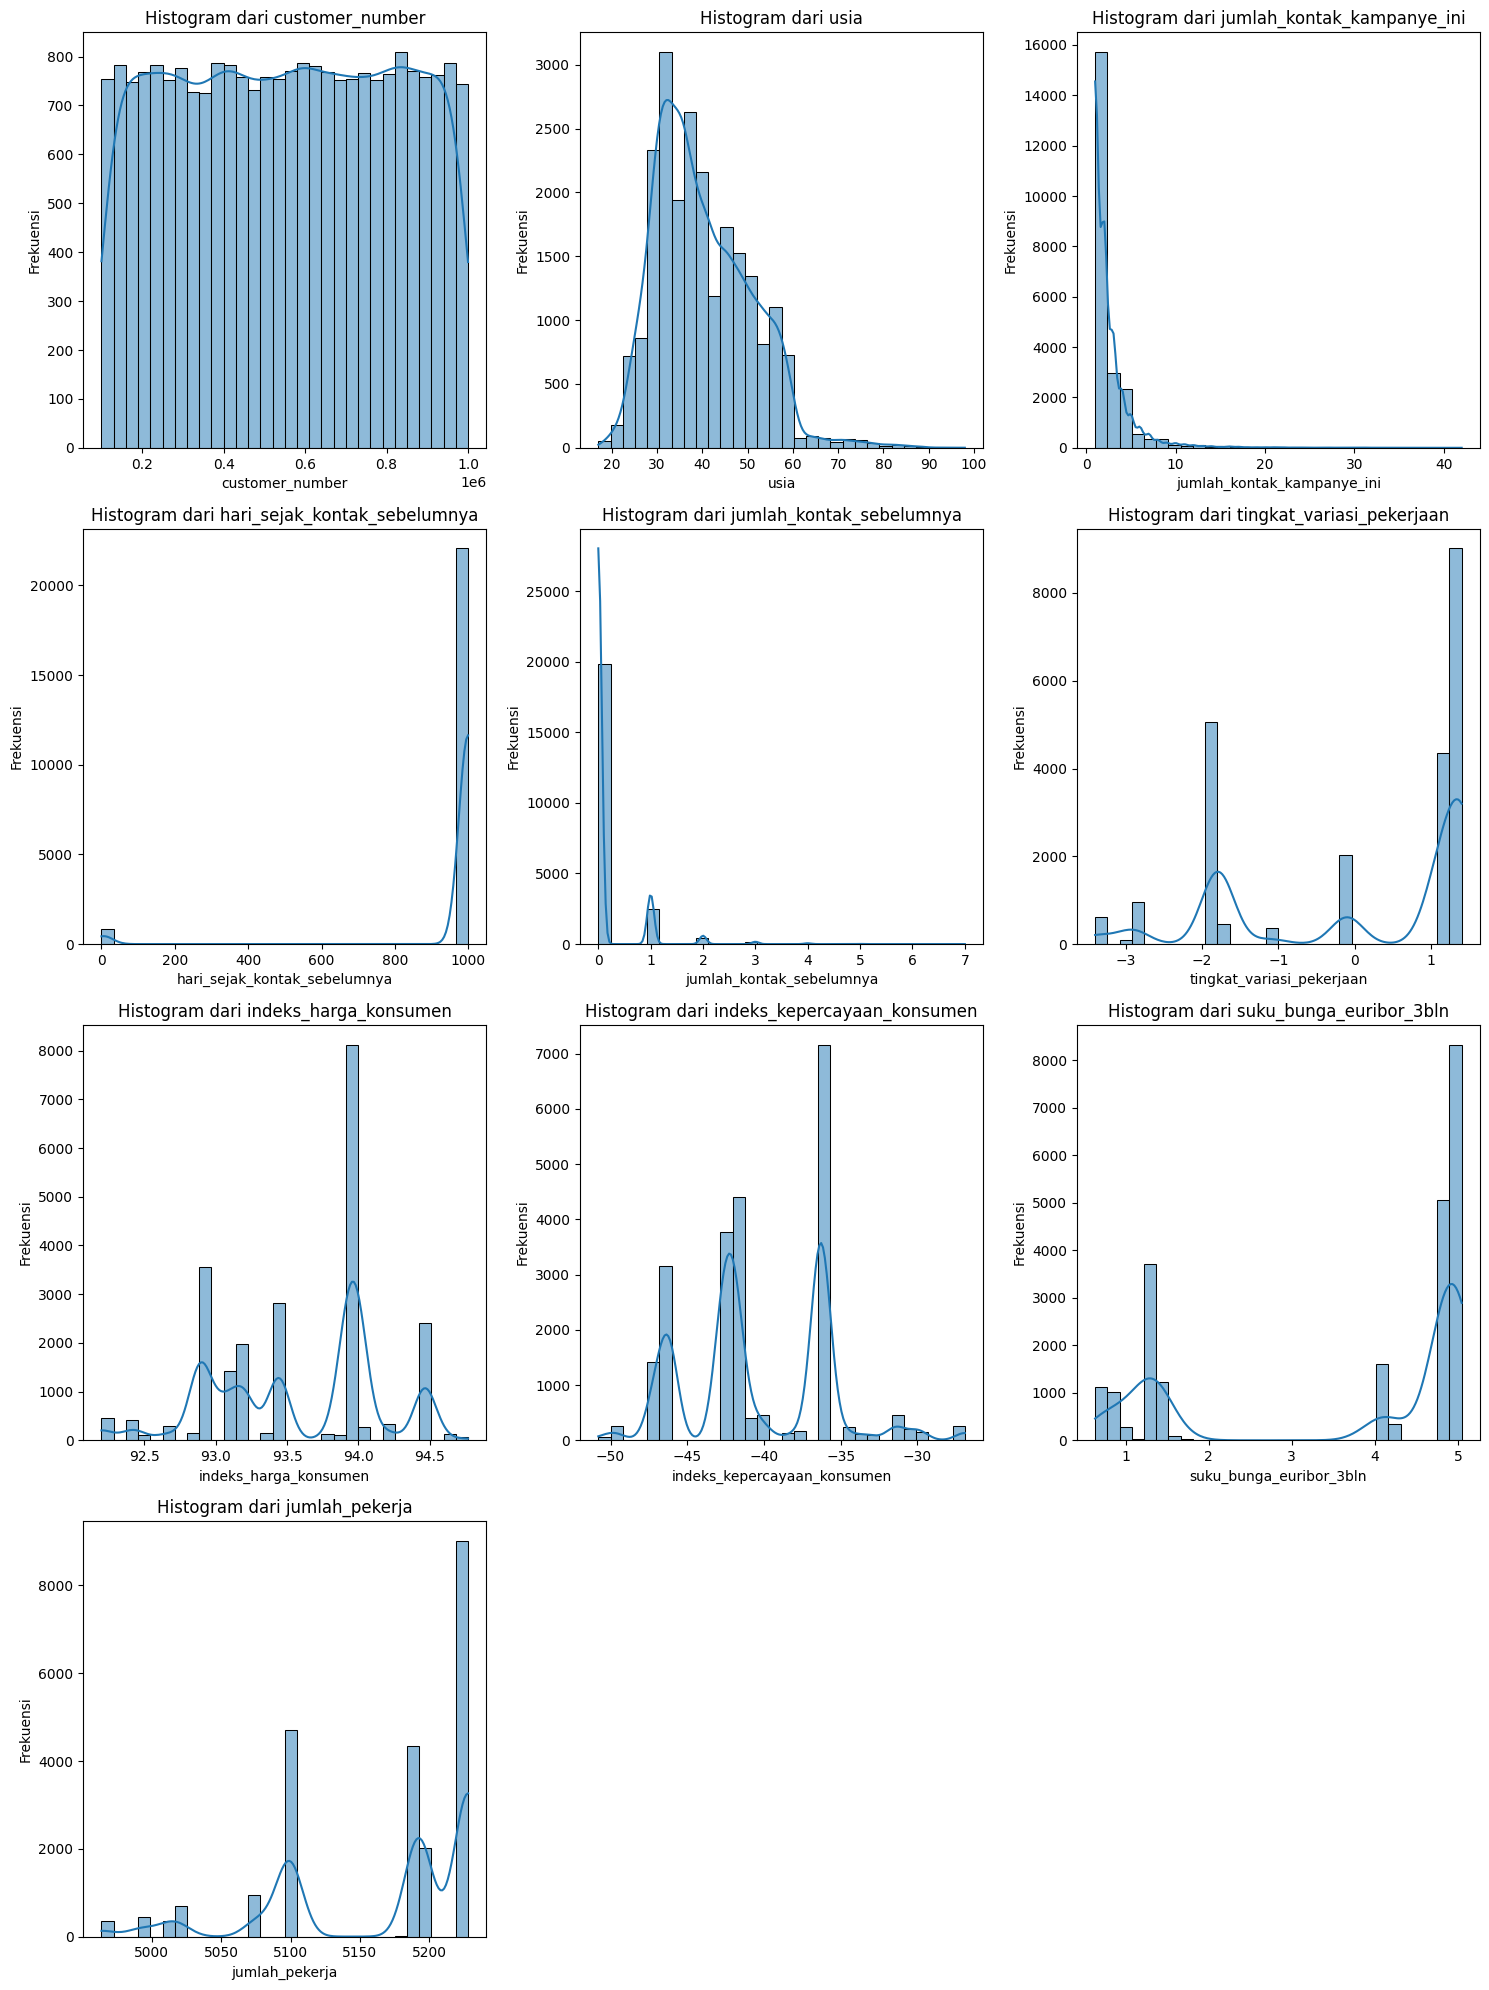

In [ ]:
# Setup subplot: 3 kolom per baris
n = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df_tr[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram dari {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


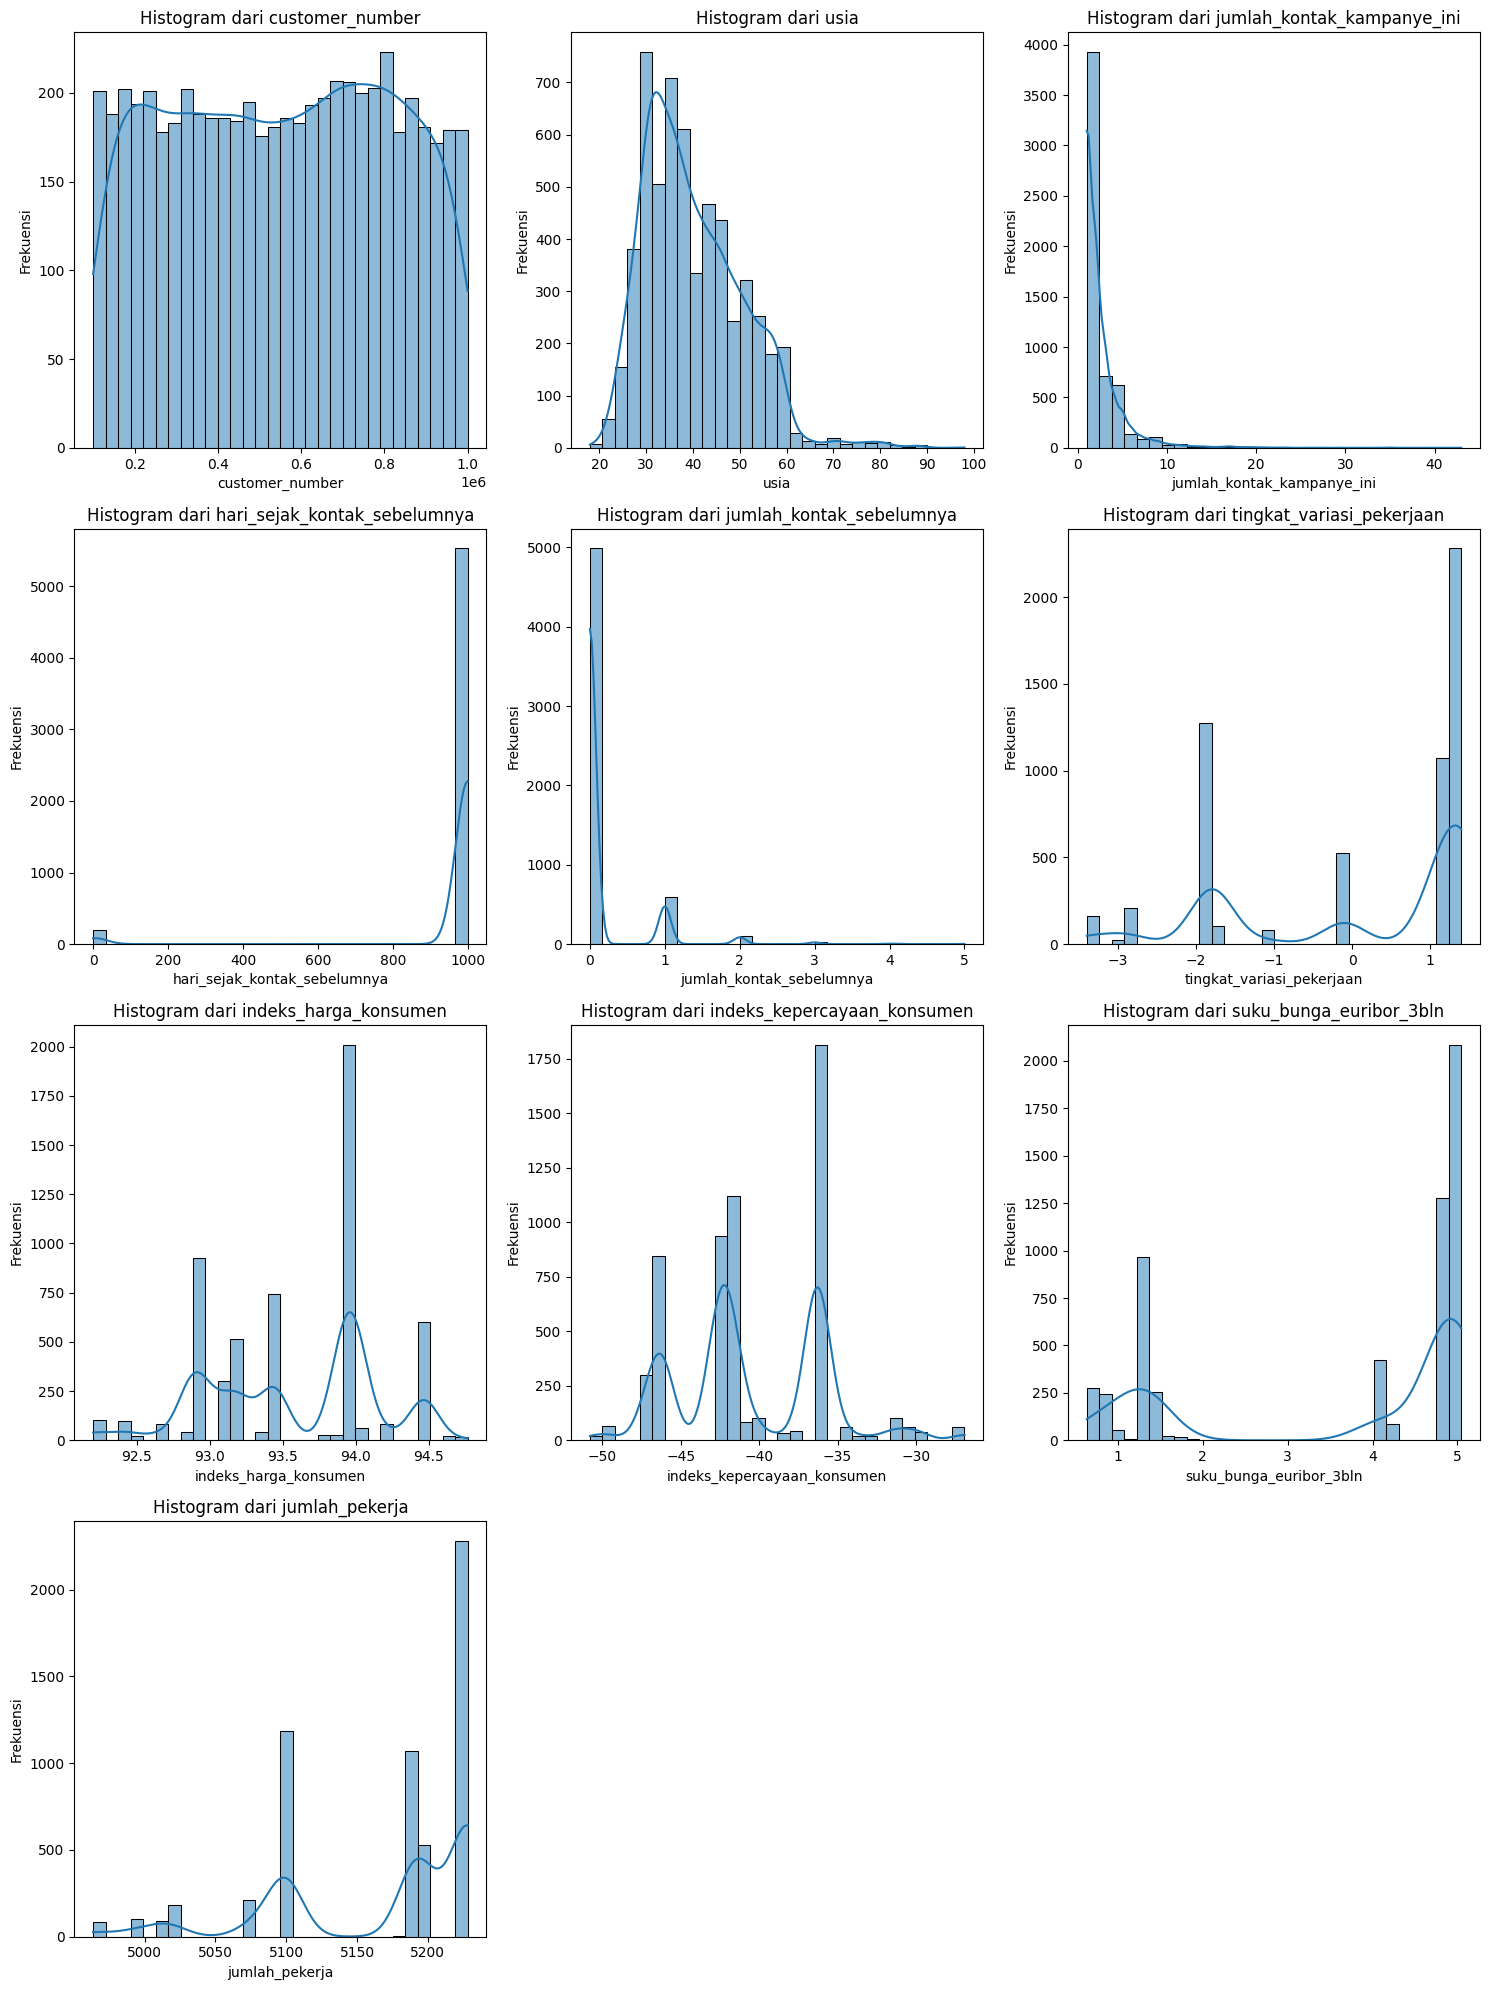

In [ ]:
# Setup subplot: 3 kolom per baris
n = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df_te[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram dari {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


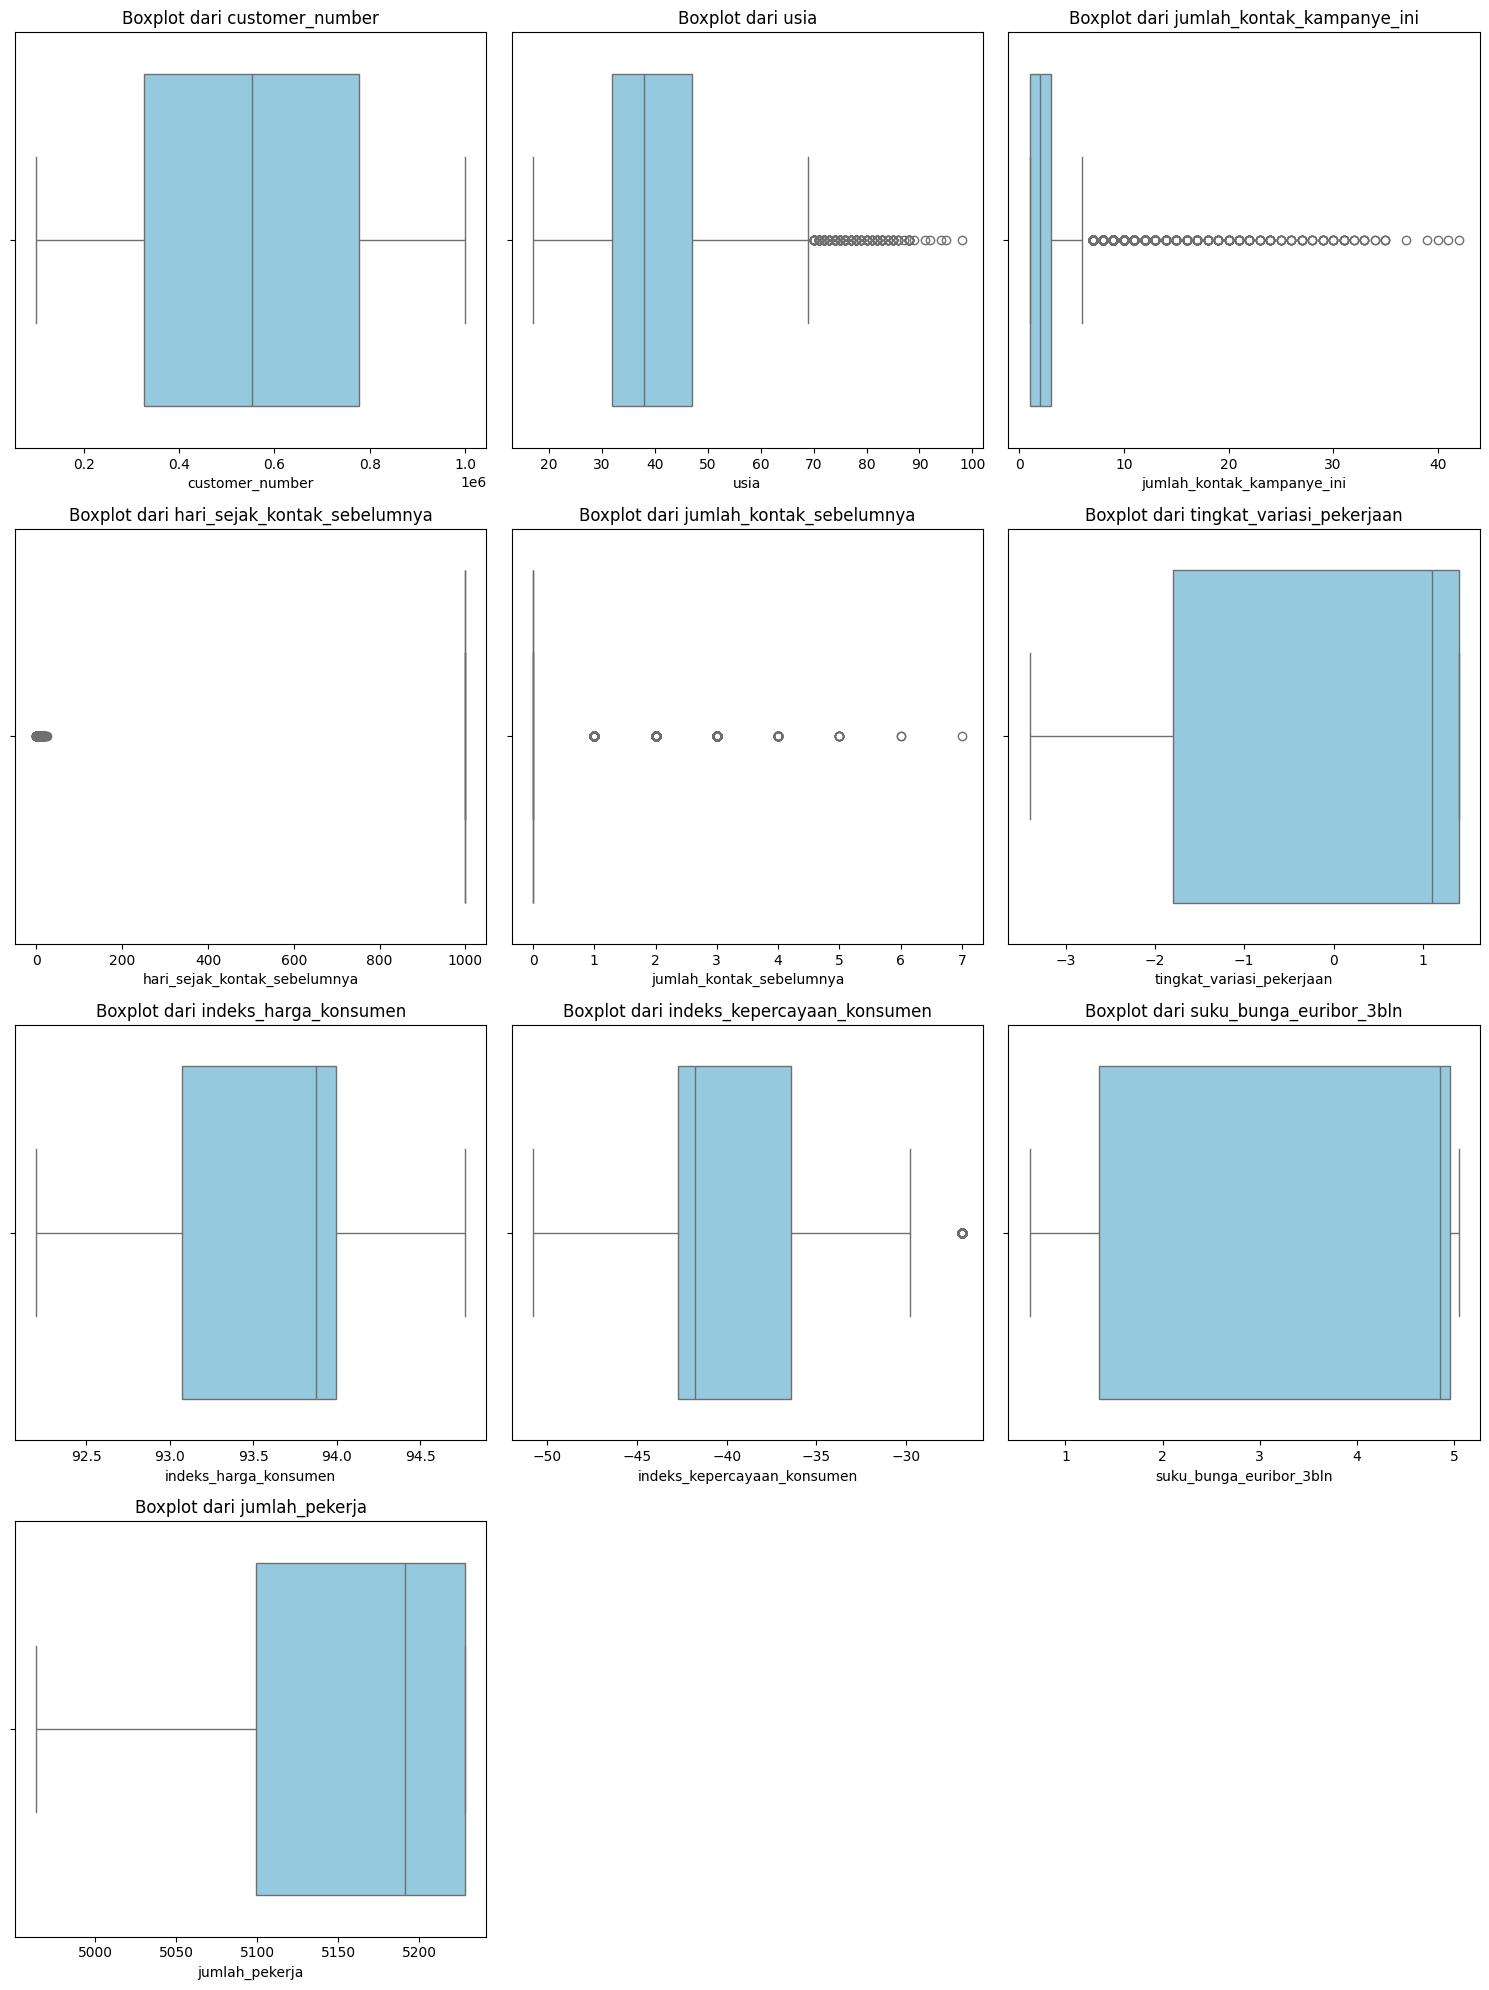

In [ ]:
# Setup subplot: 3 kolom per baris
n = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot boxplot untuk setiap variabel numerik
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_tr[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot dari {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

# Hapus axis kosong jika jumlah variabel tidak pas dengan jumlah subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


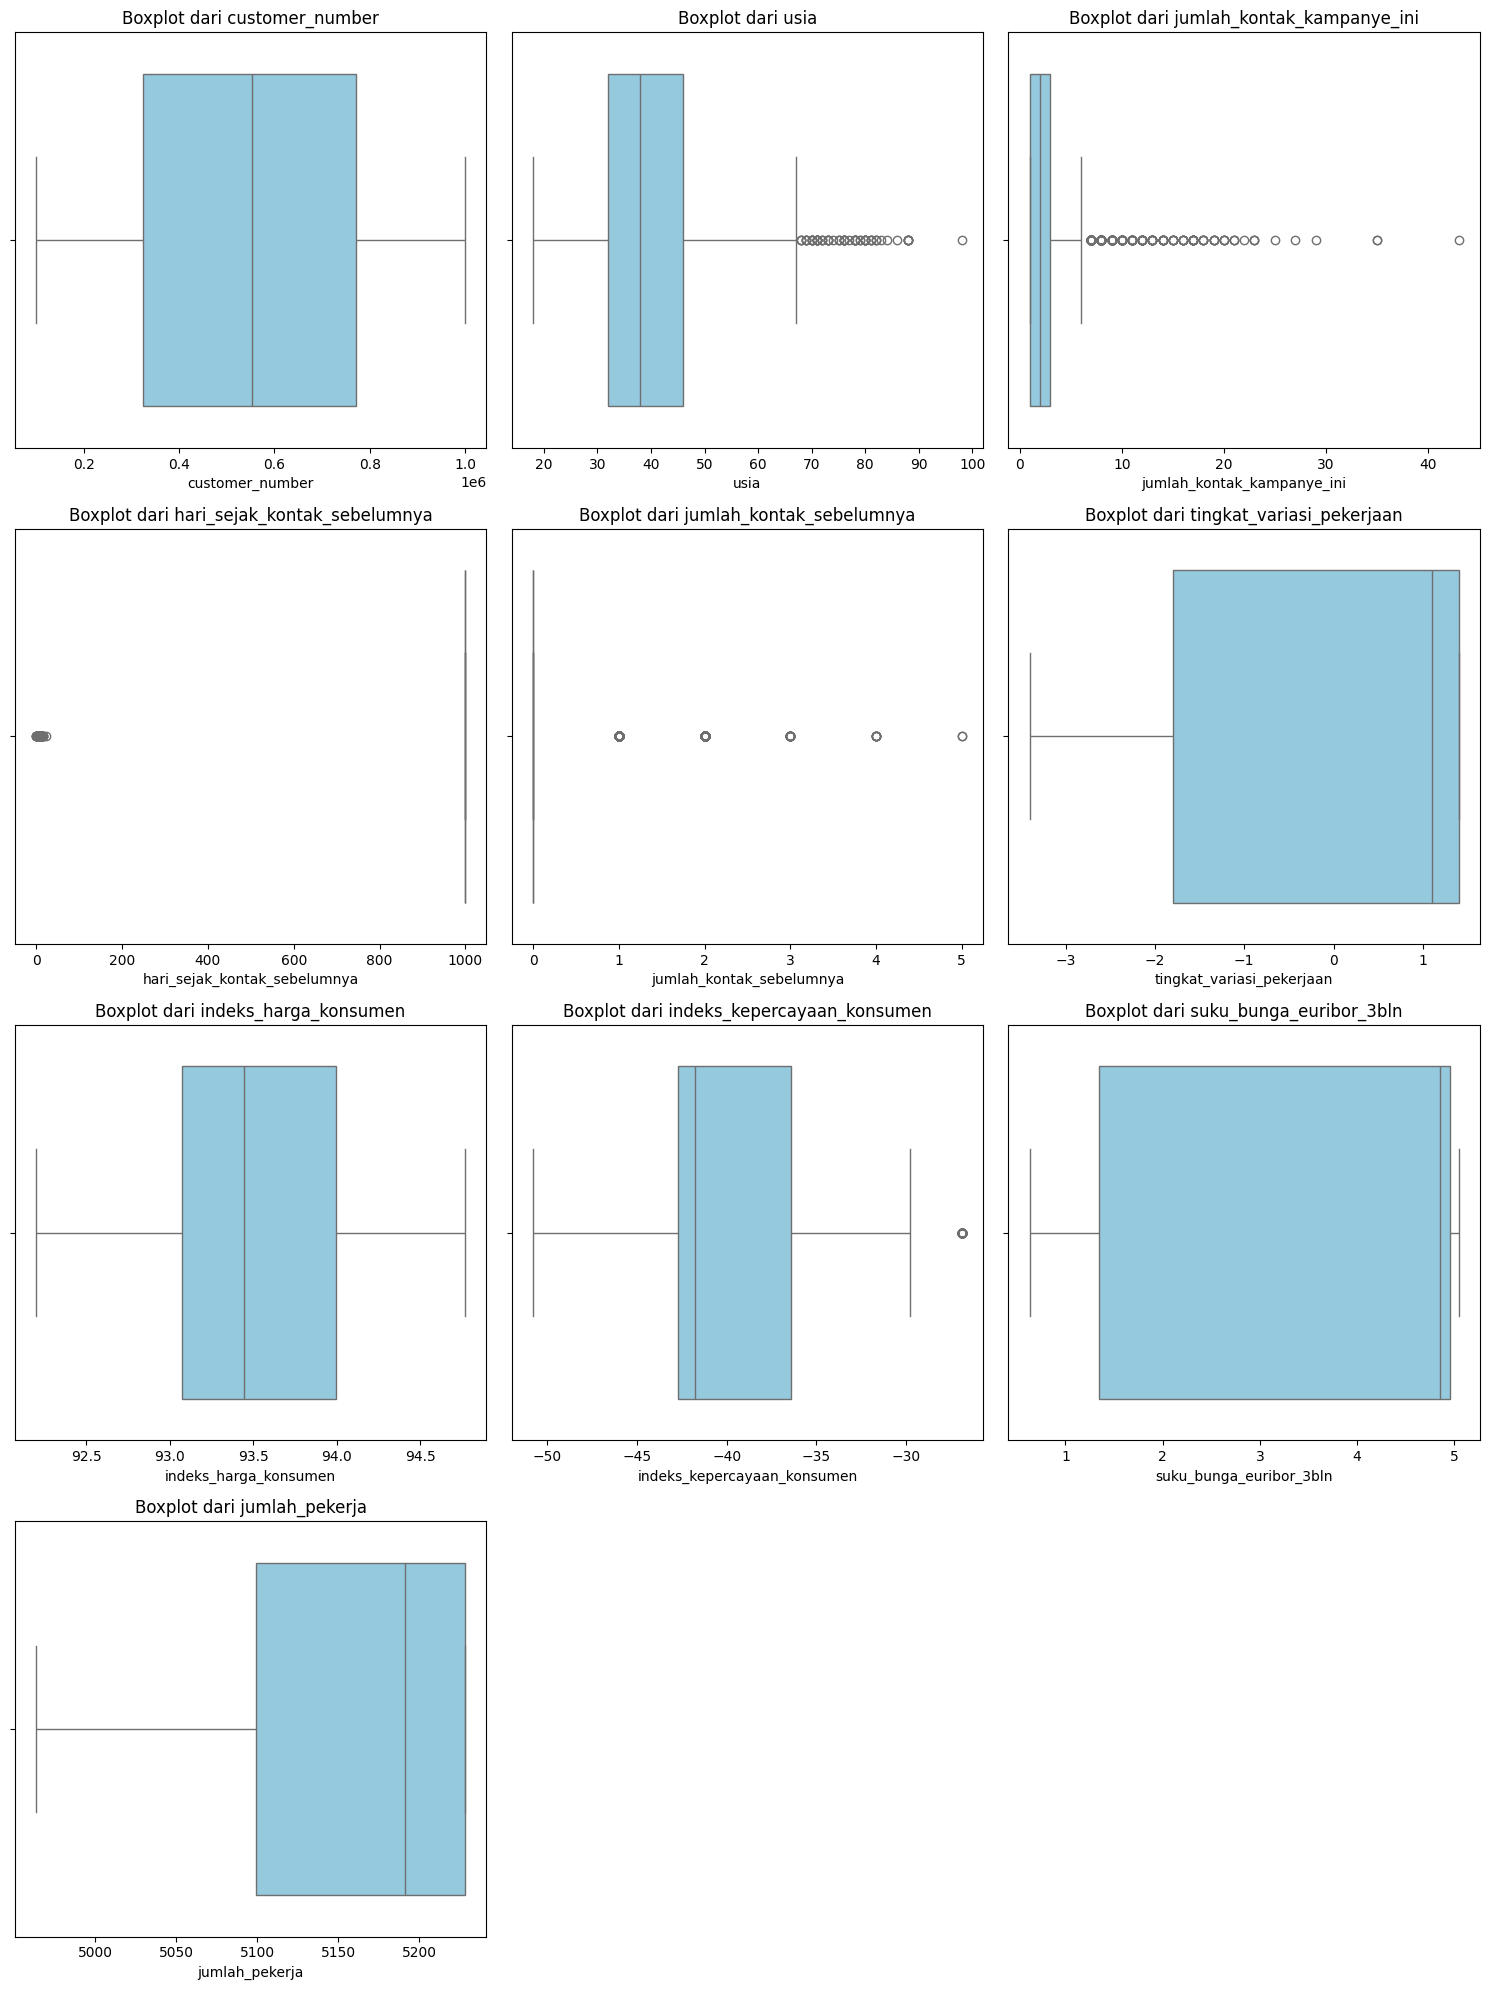

In [ ]:
# Setup subplot: 3 kolom per baris
n = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot boxplot untuk setiap variabel numerik
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_te[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot dari {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

# Hapus axis kosong jika jumlah variabel tidak pas dengan jumlah subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Distribusi Variabel Kategorik

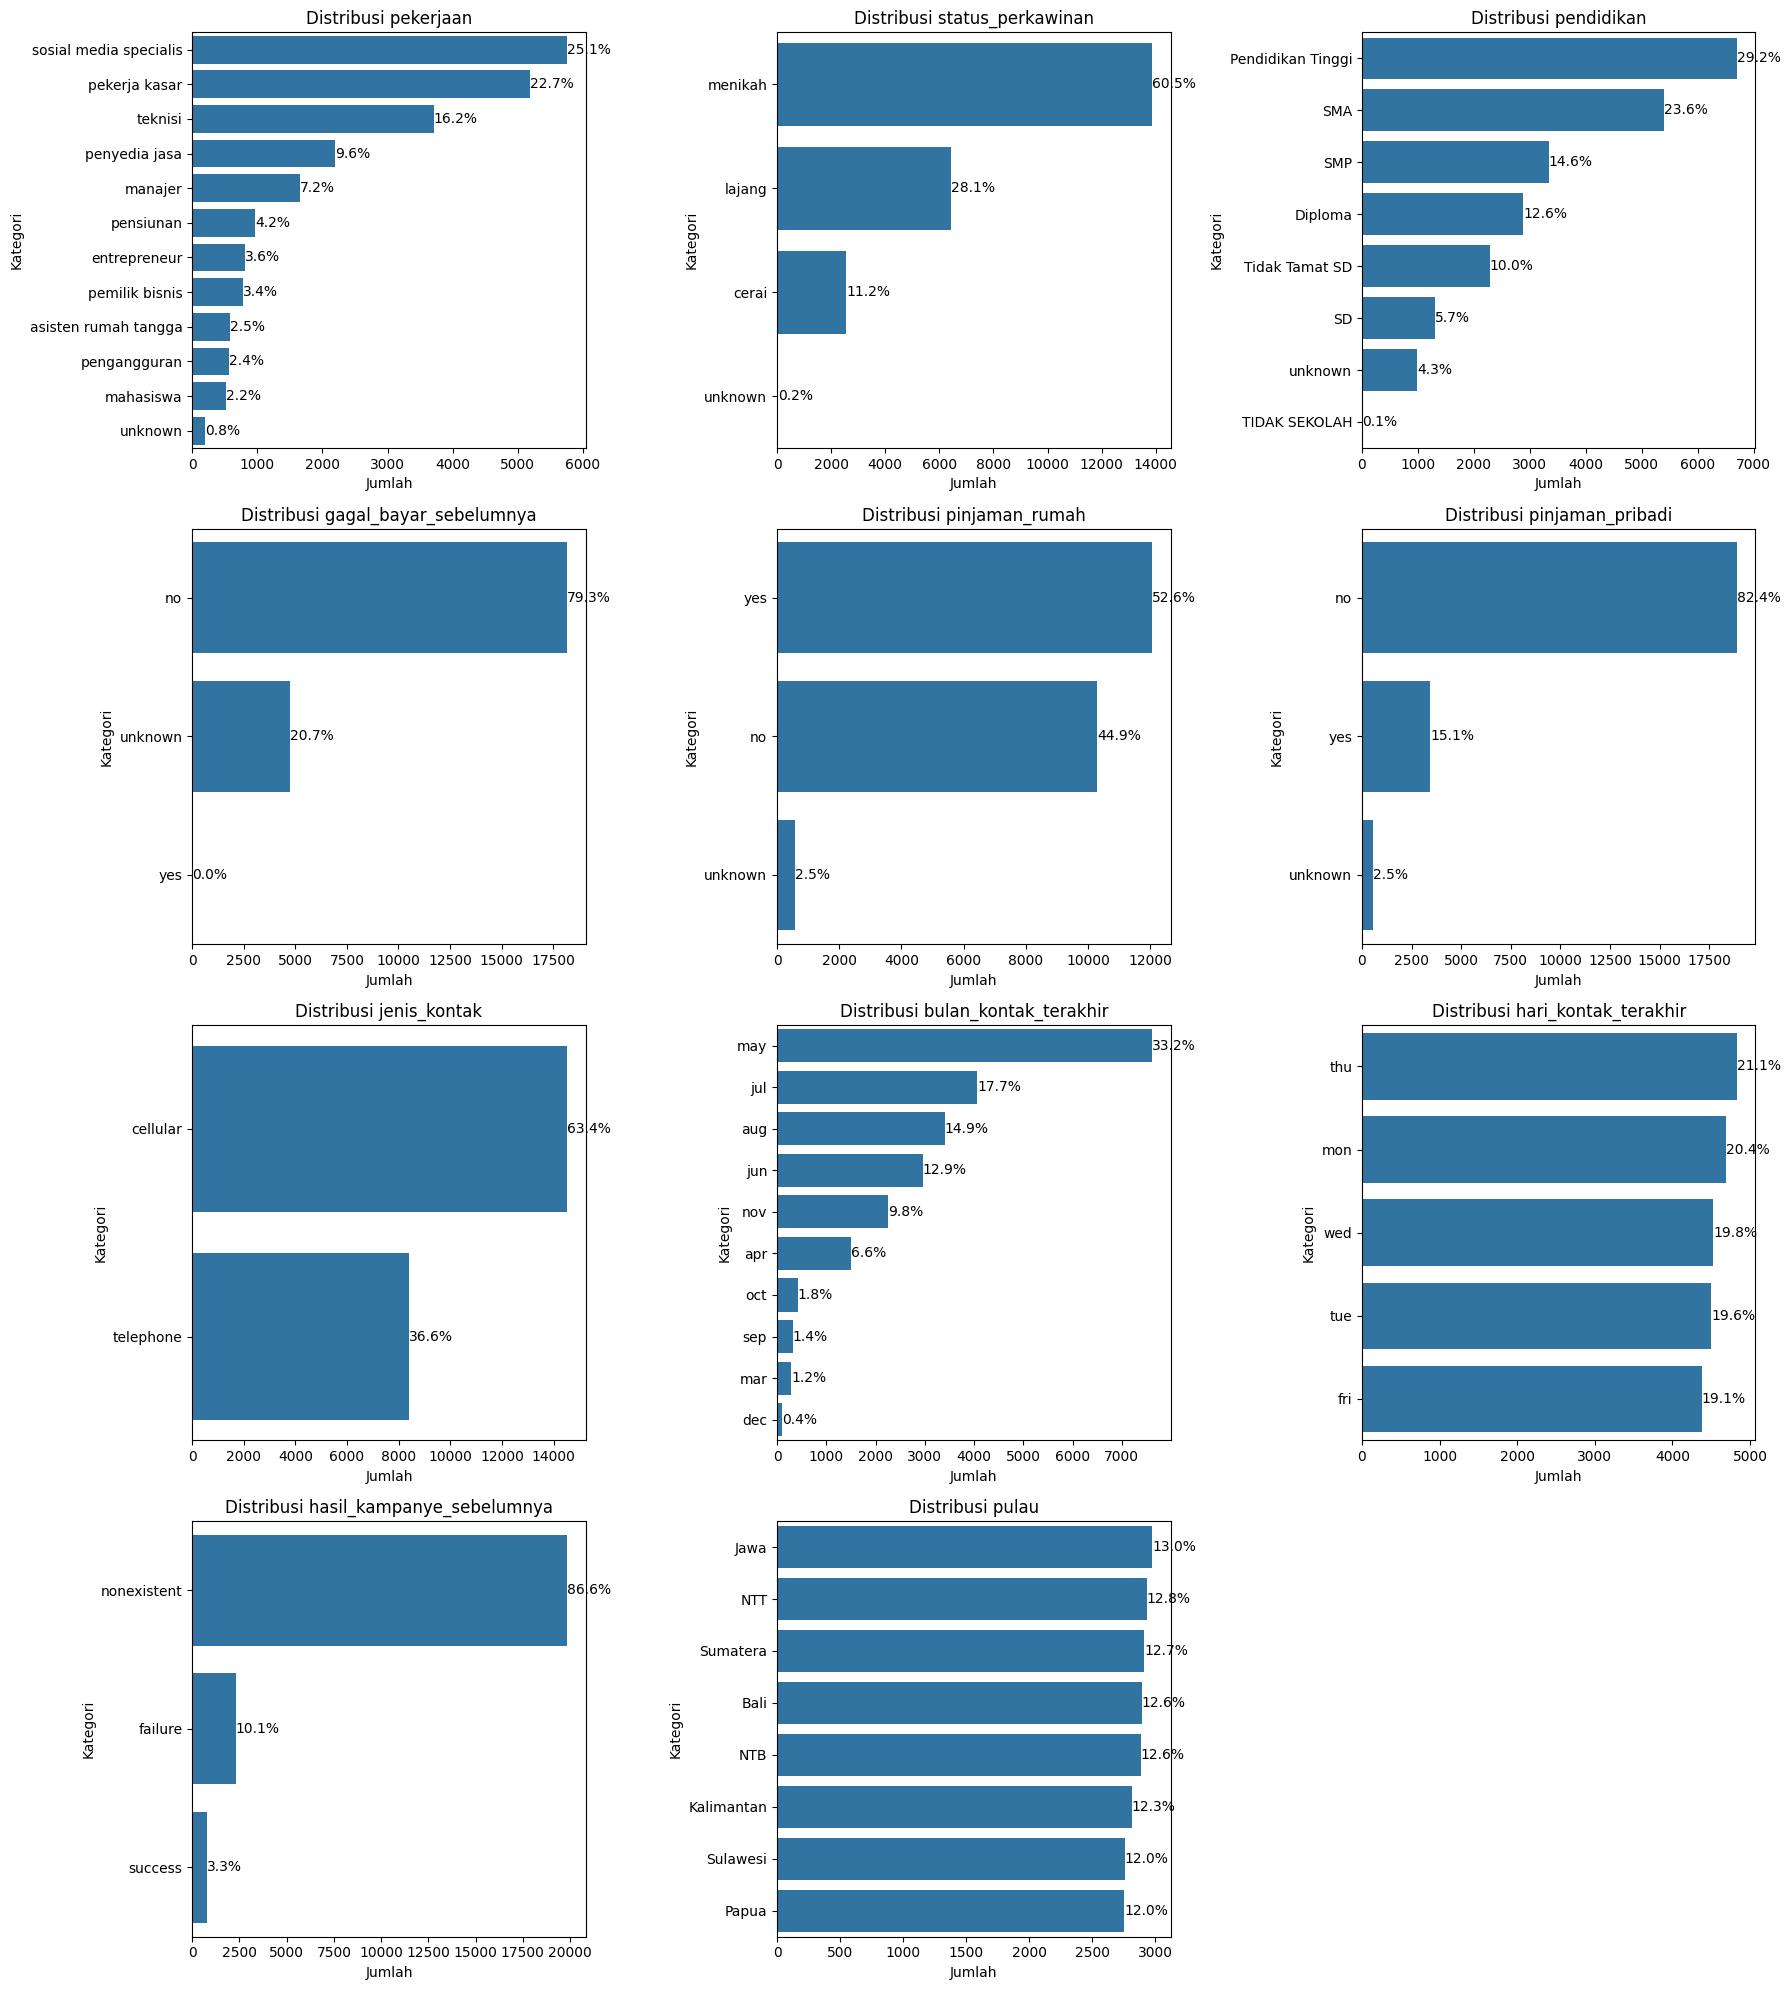

In [ ]:
# Ambil kolom kategorik
cat_cols = df_tr.select_dtypes(include='object').columns
n = len(cat_cols)

# Setup subplot: 3 kolom per baris
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot bar chart untuk tiap kolom
for i, col in enumerate(cat_cols):
    data = df_tr[col].value_counts().sort_values(ascending=False)
    total = data.sum()
    ax = axes[i]
    sns.barplot(x=data.values, y=data.index, ax=ax)

    # Tambahkan label persentase di setiap bar
    for idx, (value, label) in enumerate(zip(data.values, data.index)):
        percent = value / total * 100
        ax.text(value + 0.5, idx, f'{percent:.1f}%', va='center')

    ax.set_title(f'Distribusi {col}')
    ax.set_xlabel('Jumlah')
    ax.set_ylabel('Kategori')

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


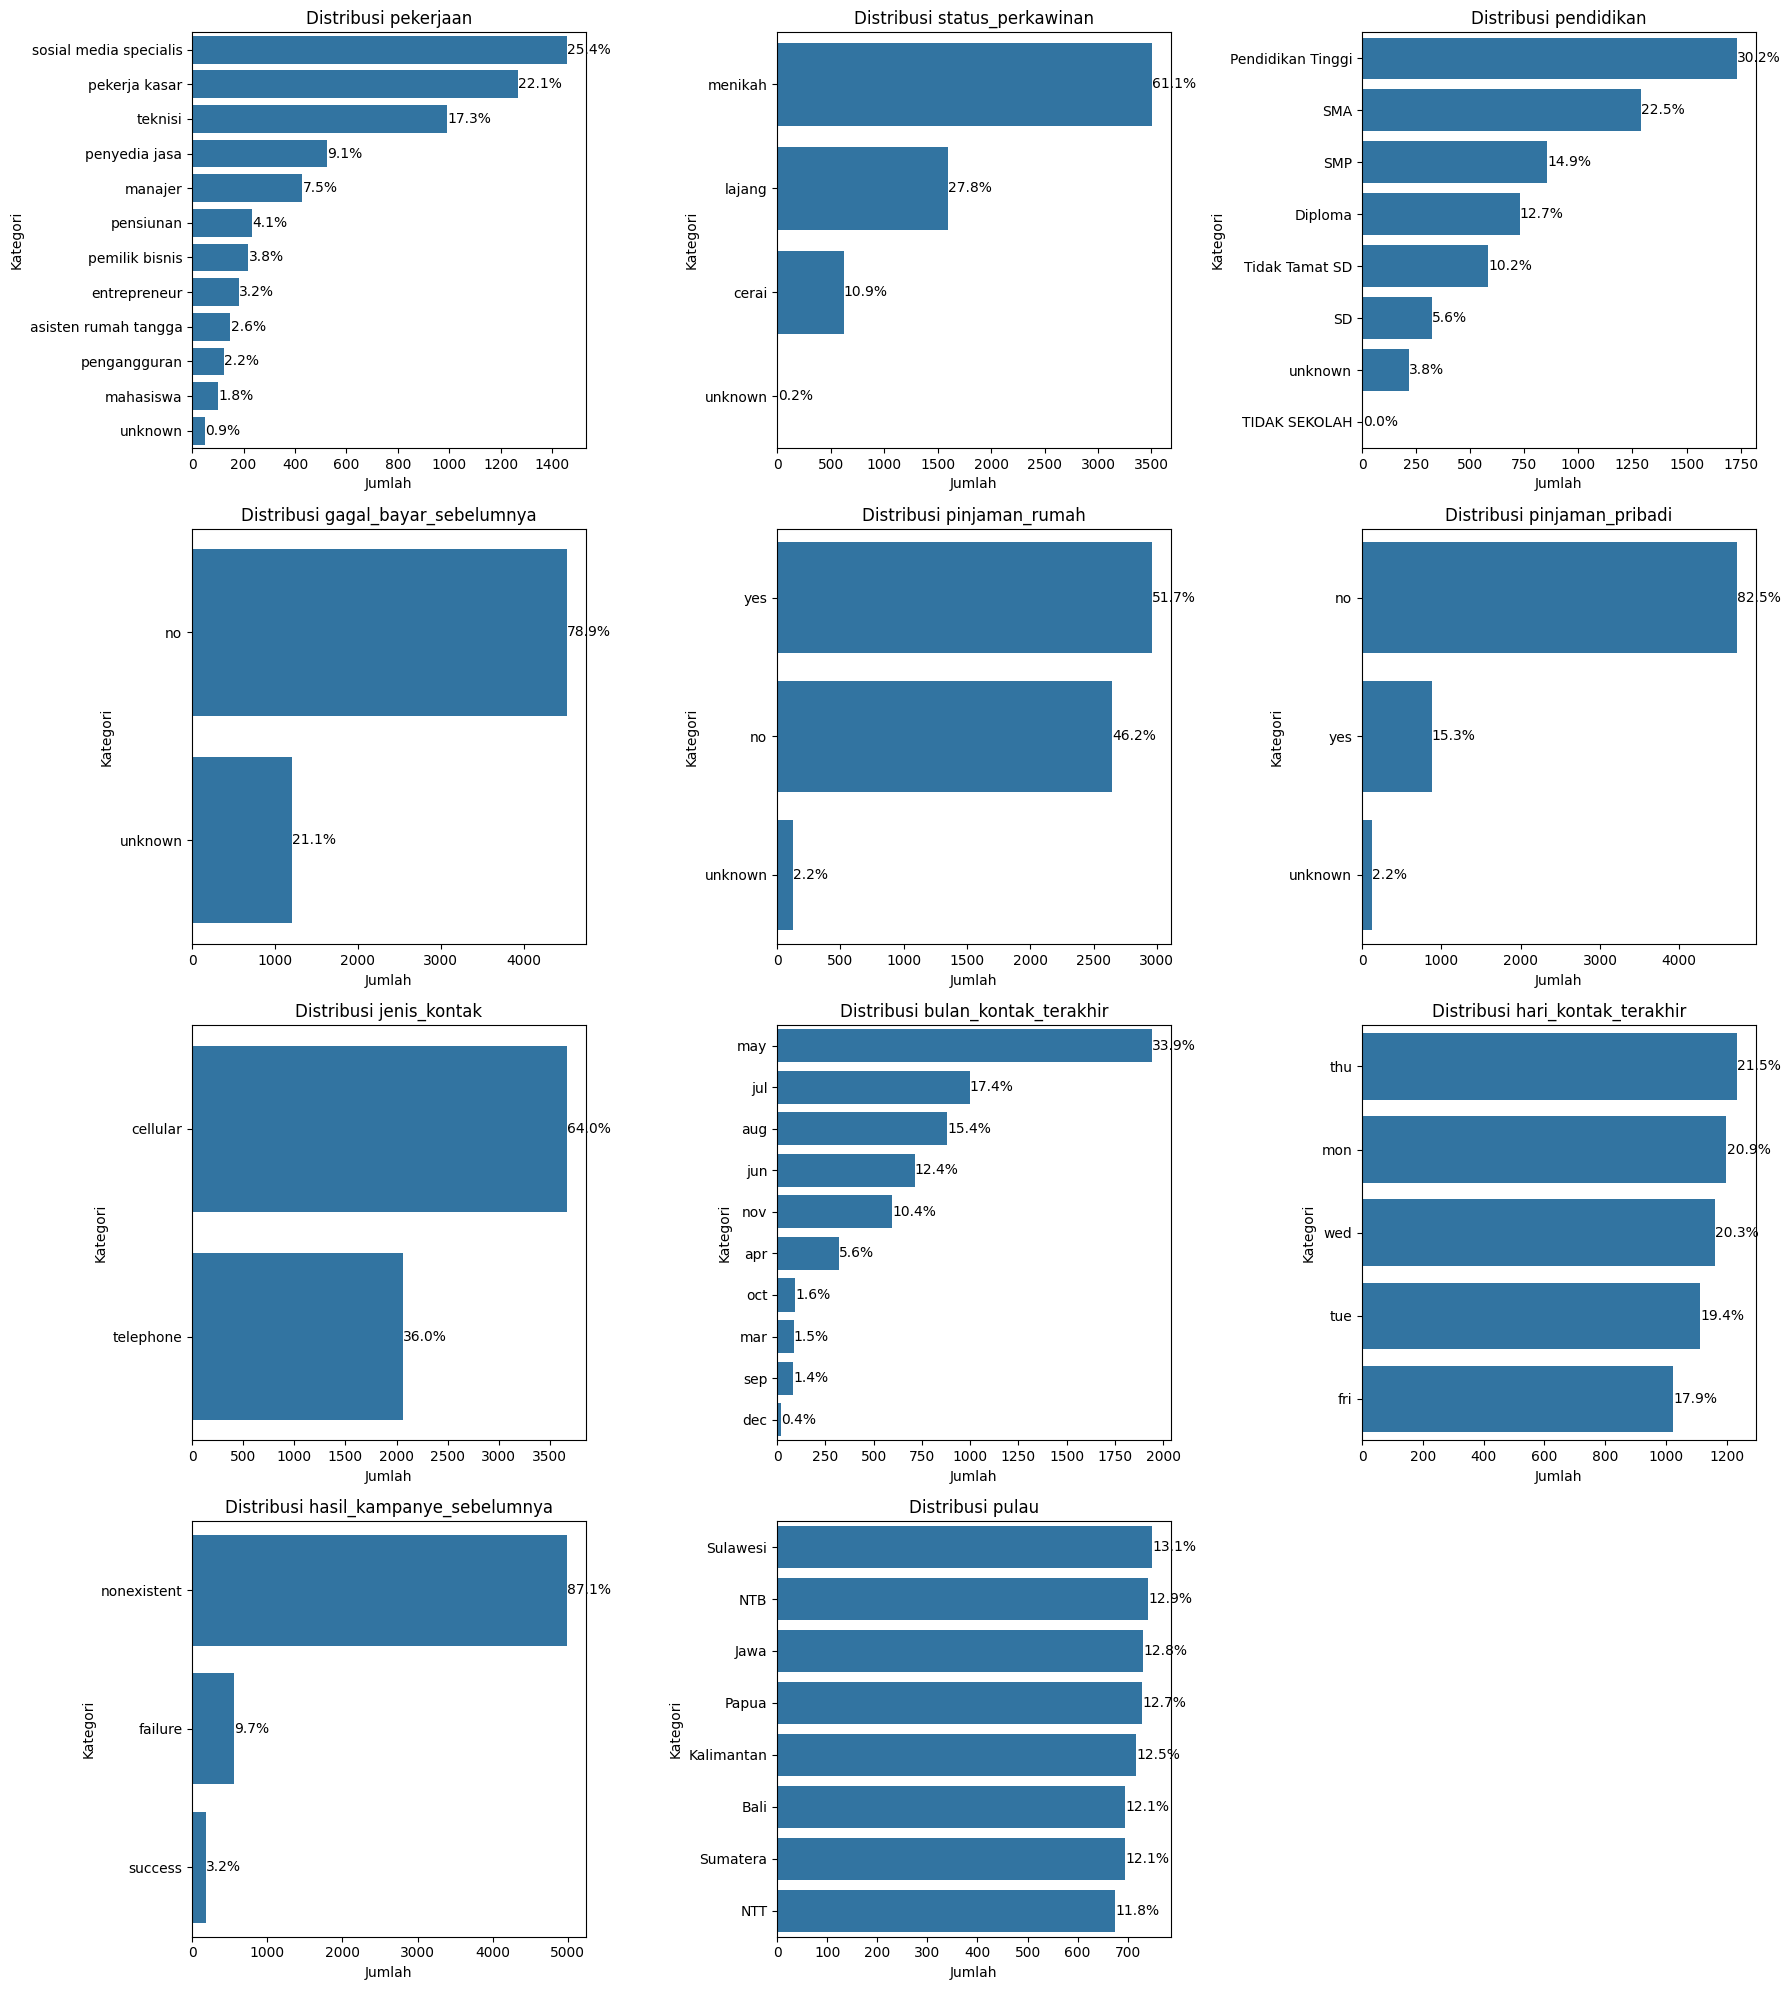

In [ ]:
# Ambil kolom kategorik
cat_cols = df_te.select_dtypes(include='object').columns
n = len(cat_cols)

# Setup subplot: 3 kolom per baris
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot bar chart untuk tiap kolom
for i, col in enumerate(cat_cols):
    data = df_te[col].value_counts().sort_values(ascending=False)
    total = data.sum()
    ax = axes[i]
    sns.barplot(x=data.values, y=data.index, ax=ax)

    # Tambahkan label persentase di setiap bar
    for idx, (value, label) in enumerate(zip(data.values, data.index)):
        percent = value / total * 100
        ax.text(value + 0.5, idx, f'{percent:.1f}%', va='center')

    ax.set_title(f'Distribusi {col}')
    ax.set_xlabel('Jumlah')
    ax.set_ylabel('Kategori')

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Proporsi Variabel Target

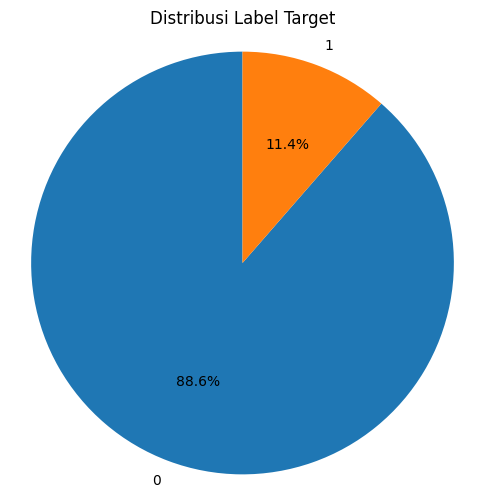

In [ ]:
# Buat pie chart
plt.figure(figsize=(6, 6))
target = df_tr['berlangganan_deposito'].value_counts()
plt.pie(target, labels=target.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Label Target')
plt.axis('equal')
plt.show()

### Correlation

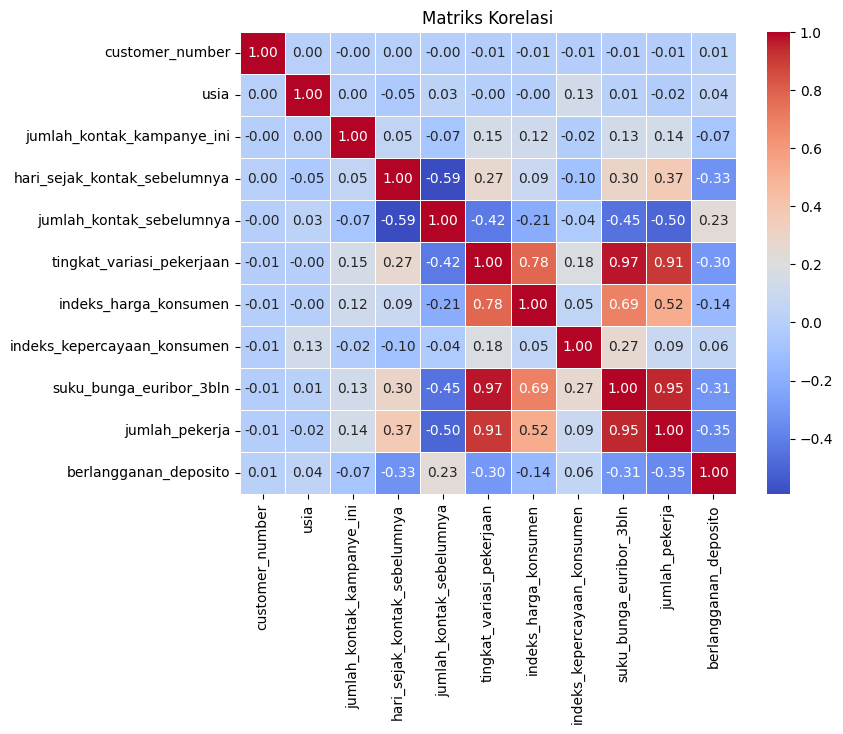

In [ ]:
numeric_cols = df_tr.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8, 6))
sns.heatmap(df_tr[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

# **2 - Preprocessing**

### Mengubah data string menjadi lowercase

In [ ]:
for col in df_tr.select_dtypes(include='object').columns:
    df_tr[col] = df_tr[col].str.lower()
    df_te[col] = df_te[col].str.lower()

In [ ]:
# Buat dictionary: key = nama kolom, value = list nilai unik
unique_dict = {
    col: df_tr[col].unique().tolist()
    for col in df_tr.select_dtypes(include='object').columns
}

# Konversi dictionary jadi DataFrame
unique_df = pd.DataFrame(list(unique_dict.items()), columns=['Kolom', 'Unique Values'])

# Tampilkan
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
unique_df


,Kolom,Unique Values
0,pekerjaan,"[sosial media specialis, teknisi, pekerja kasar, manajer, asisten rumah tangga, mahasiswa, penyedia jasa, pemilik bisnis, entrepreneur, pengangguran, pensiunan, unknown]"
1,status_perkawinan,"[menikah, lajang, cerai, unknown]"
2,pendidikan,"[pendidikan tinggi, sma, tidak tamat sd, smp, diploma, sd, unknown, tidak sekolah]"
3,gagal_bayar_sebelumnya,"[no, unknown, yes]"
4,pinjaman_rumah,"[yes, no, unknown]"
5,pinjaman_pribadi,"[no, yes, unknown]"
6,jenis_kontak,"[cellular, telephone]"
7,bulan_kontak_terakhir,"[jul, nov, may, aug, oct, apr, jun, sep, mar, dec]"
8,hari_kontak_terakhir,"[fri, thu, wed, tue, mon]"
9,hasil_kampanye_sebelumnya,"[nonexistent, failure, success]"


In [ ]:
# Buat dictionary: key = nama kolom, value = list nilai unik
unique_dict = {
    col: df_te[col].unique().tolist()
    for col in df_te.select_dtypes(include='object').columns
}

# Konversi dictionary jadi DataFrame
unique_df = pd.DataFrame(list(unique_dict.items()), columns=['Kolom', 'Unique Values'])

# Tampilkan
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
unique_df


,Kolom,Unique Values
0,pekerjaan,"[penyedia jasa, teknisi, pekerja kasar, pengangguran, sosial media specialis, pensiunan, asisten rumah tangga, manajer, mahasiswa, entrepreneur, pemilik bisnis, unknown]"
1,status_perkawinan,"[menikah, lajang, cerai, unknown]"
2,pendidikan,"[sma, diploma, smp, tidak tamat sd, sd, pendidikan tinggi, unknown, tidak sekolah]"
3,gagal_bayar_sebelumnya,"[no, unknown]"
4,pinjaman_rumah,"[yes, no, unknown]"
5,pinjaman_pribadi,"[yes, no, unknown]"
6,jenis_kontak,"[cellular, telephone]"
7,bulan_kontak_terakhir,"[jul, may, jun, apr, nov, aug, mar, dec, sep, oct]"
8,hari_kontak_terakhir,"[mon, thu, wed, tue, fri]"
9,hasil_kampanye_sebelumnya,"[nonexistent, failure, success]"


In [ ]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

### Cek Duplikasi Data

In [ ]:
df_tr.duplicated().any()

np.False_

# **3 - Feature Engineering**

### Pekerjaan

In [ ]:
job_mapping = {
    'sosial media specialis': 'Pekerja kantoran',
    'teknisi': 'Pekerja lapangan',
    'pekerja kasar': 'Pekerja lapangan',
    'manajer': 'Pekerja kantoran',
    'asisten rumah tangga': 'Pekerja jasa',
    'mahasiswa': 'Pelajar',
    'penyedia jasa': 'Pekerja jasa',
    'pemilik bisnis': 'Wirausahawan',
    'entrepreneur': 'Wirausahawan',
    'pengangguran': 'Pengangguran',
    'pensiunan': 'Pensiunan',
    'unknown': 'unknown'
}

df_tr['pekerjaan'] = df_tr['pekerjaan'].replace(job_mapping)
df_te['pekerjaan'] = df_te['pekerjaan'].replace(job_mapping)

### Pendidikan

In [ ]:
edu_mapping = {
    'Pendidikan Tinggi': 'Pendidikan Tinggi',
    'Diploma': 'Pendidikan Tinggi',
    'SMA': 'Menengah Atas',
    'SMP': 'Menengah Pertama',
    'SD': 'Dasar',
    'Tidak Tamat SD': 'Dasar',
    'TIDAK SEKOLAH': 'Tidak Sekolah',
    'unknown': 'Tidak Diketahui'
}

df_tr['pendidikan'] = df_tr['pendidikan'].replace(edu_mapping)
df_te['pendidikan'] = df_te['pendidikan'].replace(edu_mapping)


### Rasio Kontak Kampanye ini dibanding Sebelumnya

In [ ]:
df_tr['rasio_kontak'] = df_tr['jumlah_kontak_kampanye_ini'] / (df_tr['jumlah_kontak_sebelumnya']+0.000001)
df_te['rasio_kontak'] = df_te['jumlah_kontak_kampanye_ini'] / (df_te['jumlah_kontak_sebelumnya']+0.000001)


### Rasio IHK IKK VS Euribot

In [ ]:
df_tr['skor'] = (df_tr['suku_bunga_euribor_3bln'] *(1/df_tr['indeks_harga_konsumen'])) + (1/df_tr['indeks_kepercayaan_konsumen'])
df_te['skor'] = (df_te['suku_bunga_euribor_3bln'] *(1/df_te['indeks_harga_konsumen'])) + (1/df_te['indeks_kepercayaan_konsumen'])


In [ ]:
df_tr['rasio_ihkikk_euri'] = (df_tr['indeks_kepercayaan_konsumen'] + df_tr['indeks_harga_konsumen'])/df_tr['suku_bunga_euribor_3bln']
df_te['rasio_ihkikk_euri'] = (df_te['indeks_kepercayaan_konsumen'] + df_te['indeks_harga_konsumen'])/df_te['suku_bunga_euribor_3bln']

### Rasio Jumlah Variasi Pekerjaan VS Euribor

In [ ]:
df_tr['rasio_varjum_euri'] = (df_tr['jumlah_pekerja'] * df_tr['tingkat_variasi_pekerjaan'])/df_tr['suku_bunga_euribor_3bln']
df_te['rasio_varjum_euri'] = (df_te['jumlah_pekerja'] * df_te['tingkat_variasi_pekerjaan'])/df_te['suku_bunga_euribor_3bln']

### Variabel Usia

In [ ]:
def age(dataframe):
    dataframe.loc[dataframe['usia'] <= 32, 'usia'] = 1
    dataframe.loc[(dataframe['usia'] > 32) & (dataframe['usia'] <= 47), 'usia'] = 2
    dataframe.loc[(dataframe['usia'] > 47) & (dataframe['usia'] <= 70), 'usia'] = 3
    dataframe.loc[(dataframe['usia'] > 70) & (dataframe['usia'] <= 98), 'usia'] = 4

    return dataframe

age(df_tr)
age(df_te)

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,rasio_kontak,skor,rasio_ihkikk_euri,rasio_varjum_euri
0,445420,2,Pekerja jasa,menikah,sma,no,yes,yes,cellular,jul,...,1.4,93.918,-42.7,4.960,5228.1,jawa,1.000000e+06,0.029393,10.326210,1475.673387
1,585604,3,Pekerja lapangan,lajang,diploma,unknown,no,no,telephone,may,...,1.1,93.994,-36.4,4.860,5191.0,papua,4.000000e+06,0.024233,11.850617,1174.917695
2,888824,2,Pekerja lapangan,menikah,smp,unknown,yes,no,telephone,may,...,1.1,93.994,-36.4,4.856,5191.0,bali,3.000000e+06,0.024190,11.860379,1175.885502
3,816820,3,Pengangguran,menikah,diploma,no,no,no,telephone,may,...,1.1,93.994,-36.4,4.857,5191.0,sumatera,3.000000e+06,0.024201,11.857937,1175.643401
4,542716,2,Pekerja lapangan,cerai,sma,no,yes,no,cellular,may,...,-1.8,92.893,-46.2,1.327,5099.1,sumatera,9.999990e-01,-0.007360,35.186888,-6916.639035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,3,Pekerja lapangan,menikah,tidak tamat sd,no,yes,no,telephone,jun,...,1.4,94.465,-41.8,4.961,5228.1,kalimantan,1.000000e+06,0.028593,10.615803,1475.375932
5725,116371,1,Pekerja lapangan,menikah,smp,no,yes,yes,telephone,may,...,1.1,93.994,-36.4,4.855,5191.0,sulawesi,1.000000e+06,0.024180,11.862822,1176.127703
5726,773759,2,Pekerja lapangan,menikah,smp,unknown,yes,no,telephone,may,...,1.1,93.994,-36.4,4.857,5191.0,ntb,1.000000e+06,0.024201,11.857937,1175.643401
5727,612330,3,Pekerja lapangan,menikah,diploma,unknown,no,no,telephone,jul,...,1.4,93.918,-42.7,4.961,5228.1,papua,1.500000e+07,0.029403,10.324128,1475.375932


### Jumlah Pekerja

In [ ]:
def pekerja(dataframe):
    dataframe.loc[dataframe['jumlah_pekerja'] <= 5050, 'jumlah_pekerja'] = 1
    dataframe.loc[(dataframe['jumlah_pekerja'] > 5050) & (dataframe['jumlah_pekerja'] <= 5150), 'jumlah_pekerja'] = 2
    dataframe.loc[(dataframe['jumlah_pekerja'] > 5150) & (dataframe['jumlah_pekerja'] <= 5250), 'jumlah_pekerja'] = 3

    return dataframe

pekerja(df_tr)
pekerja(df_te)

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,rasio_kontak,skor,rasio_ihkikk_euri,rasio_varjum_euri
0,445420,2,Pekerja jasa,menikah,sma,no,yes,yes,cellular,jul,...,1.4,93.918,-42.7,4.960,3.0,jawa,1.000000e+06,0.029393,10.326210,1475.673387
1,585604,3,Pekerja lapangan,lajang,diploma,unknown,no,no,telephone,may,...,1.1,93.994,-36.4,4.860,3.0,papua,4.000000e+06,0.024233,11.850617,1174.917695
2,888824,2,Pekerja lapangan,menikah,smp,unknown,yes,no,telephone,may,...,1.1,93.994,-36.4,4.856,3.0,bali,3.000000e+06,0.024190,11.860379,1175.885502
3,816820,3,Pengangguran,menikah,diploma,no,no,no,telephone,may,...,1.1,93.994,-36.4,4.857,3.0,sumatera,3.000000e+06,0.024201,11.857937,1175.643401
4,542716,2,Pekerja lapangan,cerai,sma,no,yes,no,cellular,may,...,-1.8,92.893,-46.2,1.327,2.0,sumatera,9.999990e-01,-0.007360,35.186888,-6916.639035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,3,Pekerja lapangan,menikah,tidak tamat sd,no,yes,no,telephone,jun,...,1.4,94.465,-41.8,4.961,3.0,kalimantan,1.000000e+06,0.028593,10.615803,1475.375932
5725,116371,1,Pekerja lapangan,menikah,smp,no,yes,yes,telephone,may,...,1.1,93.994,-36.4,4.855,3.0,sulawesi,1.000000e+06,0.024180,11.862822,1176.127703
5726,773759,2,Pekerja lapangan,menikah,smp,unknown,yes,no,telephone,may,...,1.1,93.994,-36.4,4.857,3.0,ntb,1.000000e+06,0.024201,11.857937,1175.643401
5727,612330,3,Pekerja lapangan,menikah,diploma,unknown,no,no,telephone,jul,...,1.4,93.918,-42.7,4.961,3.0,papua,1.500000e+07,0.029403,10.324128,1475.375932


### Hari Sejak Kontak Sebelumnya

In [ ]:
df_tr['hari_sejak_kontak_sebelumnya'].value_counts()

,count
hari_sejak_kontak_sebelumnya,
999,22067
3,254
6,245
4,70
9,31
7,29
2,27
12,24
10,23


In [ ]:
def kontak_sebelumnya(dataframe):
    dataframe.loc[dataframe['hari_sejak_kontak_sebelumnya'] <= 15, 'hari_sejak_kontak_sebelumnya'] = 1
    dataframe.loc[(dataframe['hari_sejak_kontak_sebelumnya'] > 15) & (dataframe['hari_sejak_kontak_sebelumnya'] <= 30), 'hari_sejak_kontak_sebelumnya'] = 2
    dataframe.loc[(dataframe['hari_sejak_kontak_sebelumnya'] > 30), 'hari_sejak_kontak_sebelumnya'] = 3

    return dataframe

kontak_sebelumnya(df_tr)
kontak_sebelumnya(df_te)

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,rasio_kontak,skor,rasio_ihkikk_euri,rasio_varjum_euri
0,445420,2,Pekerja jasa,menikah,sma,no,yes,yes,cellular,jul,...,1.4,93.918,-42.7,4.960,3.0,jawa,1.000000e+06,0.029393,10.326210,1475.673387
1,585604,3,Pekerja lapangan,lajang,diploma,unknown,no,no,telephone,may,...,1.1,93.994,-36.4,4.860,3.0,papua,4.000000e+06,0.024233,11.850617,1174.917695
2,888824,2,Pekerja lapangan,menikah,smp,unknown,yes,no,telephone,may,...,1.1,93.994,-36.4,4.856,3.0,bali,3.000000e+06,0.024190,11.860379,1175.885502
3,816820,3,Pengangguran,menikah,diploma,no,no,no,telephone,may,...,1.1,93.994,-36.4,4.857,3.0,sumatera,3.000000e+06,0.024201,11.857937,1175.643401
4,542716,2,Pekerja lapangan,cerai,sma,no,yes,no,cellular,may,...,-1.8,92.893,-46.2,1.327,2.0,sumatera,9.999990e-01,-0.007360,35.186888,-6916.639035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,3,Pekerja lapangan,menikah,tidak tamat sd,no,yes,no,telephone,jun,...,1.4,94.465,-41.8,4.961,3.0,kalimantan,1.000000e+06,0.028593,10.615803,1475.375932
5725,116371,1,Pekerja lapangan,menikah,smp,no,yes,yes,telephone,may,...,1.1,93.994,-36.4,4.855,3.0,sulawesi,1.000000e+06,0.024180,11.862822,1176.127703
5726,773759,2,Pekerja lapangan,menikah,smp,unknown,yes,no,telephone,may,...,1.1,93.994,-36.4,4.857,3.0,ntb,1.000000e+06,0.024201,11.857937,1175.643401
5727,612330,3,Pekerja lapangan,menikah,diploma,unknown,no,no,telephone,jul,...,1.4,93.918,-42.7,4.961,3.0,papua,1.500000e+07,0.029403,10.324128,1475.375932


### One-Hot Encoding

In [ ]:
ohe_cols = ['hari_sejak_kontak_sebelumnya','jumlah_pekerja','usia','bulan_kontak_terakhir','hari_kontak_terakhir','pekerjaan', 'pendidikan', 'pulau', 'status_perkawinan', 'gagal_bayar_sebelumnya', 'pinjaman_rumah', 'pinjaman_pribadi', 'jenis_kontak', 'hasil_kampanye_sebelumnya']

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit dan transform sekaligus banyak kolom
encoded_array = onehot_encoder.fit_transform(df_tr[ohe_cols])

# Ambil nama kolom baru hasil OHE
encoded_cols = onehot_encoder.get_feature_names_out(ohe_cols)

# Ubah jadi DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df_tr.index)

# Gabungkan dengan kolom non-kategorikal
df_tr = pd.concat([df_tr.drop(columns=ohe_cols), encoded_df], axis=1)


In [ ]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit dan transform sekaligus banyak kolom
encoded_array = onehot_encoder.fit_transform(df_te[ohe_cols])

# Ambil nama kolom baru hasil OHE
encoded_cols = onehot_encoder.get_feature_names_out(ohe_cols)

# Ubah jadi DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df_te.index)

# Gabungkan dengan kolom non-kategorikal
df_te = pd.concat([df_te.drop(columns=ohe_cols), encoded_df], axis=1)


In [ ]:
display(df_tr.head(), df_te.head())

,customer_number,jumlah_kontak_kampanye_ini,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,berlangganan_deposito,rasio_kontak,skor,...,pinjaman_rumah_unknown,pinjaman_rumah_yes,pinjaman_pribadi_no,pinjaman_pribadi_unknown,pinjaman_pribadi_yes,jenis_kontak_cellular,jenis_kontak_telephone,hasil_kampanye_sebelumnya_failure,hasil_kampanye_sebelumnya_nonexistent,hasil_kampanye_sebelumnya_success
0,531036,2,0,-1.7,94.215,-40.3,0.885,1,2000000.0,-0.015420,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,999241,2,0,-0.1,93.200,-42.0,4.021,0,2000000.0,0.019334,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,995002,1,0,1.4,93.918,-42.7,4.958,0,1000000.0,0.029372,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,932750,2,0,1.1,93.994,-36.4,4.859,1,2000000.0,0.024222,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,684699,3,0,1.4,93.444,-36.1,4.964,0,3000000.0,0.025422,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,customer_number,jumlah_kontak_kampanye_ini,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,rasio_kontak,skor,rasio_ihkikk_euri,...,pinjaman_rumah_unknown,pinjaman_rumah_yes,pinjaman_pribadi_no,pinjaman_pribadi_unknown,pinjaman_pribadi_yes,jenis_kontak_cellular,jenis_kontak_telephone,hasil_kampanye_sebelumnya_failure,hasil_kampanye_sebelumnya_nonexistent,hasil_kampanye_sebelumnya_success
0,445420,1,0,1.4,93.918,-42.7,4.960,1.000000e+06,0.029393,10.326210,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,585604,4,0,1.1,93.994,-36.4,4.860,4.000000e+06,0.024233,11.850617,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,888824,3,0,1.1,93.994,-36.4,4.856,3.000000e+06,0.024190,11.860379,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,816820,3,0,1.1,93.994,-36.4,4.857,3.000000e+06,0.024201,11.857937,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,542716,1,1,-1.8,92.893,-46.2,1.327,9.999990e-01,-0.007360,35.186888,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
list1 = sorted(df_tr.columns)
list2 = sorted(df_te.columns)

set1 = set(list1)
set2 = set(list2)

only_in_list1 = sorted(set1 - set2)
only_in_list2 = sorted(set2 - set1)
common_columns = sorted(set1 & set2)

print("Kolom hanya di list 1:")
print(only_in_list1)

print("\nKolom hanya di list 2:")
print(only_in_list2)

print("\nKolom yang sama di kedua list:")
print(common_columns)


Kolom hanya di list 1:
['berlangganan_deposito', 'gagal_bayar_sebelumnya_yes']

Kolom hanya di list 2:
[]

Kolom yang sama di kedua list:
['bulan_kontak_terakhir_apr', 'bulan_kontak_terakhir_aug', 'bulan_kontak_terakhir_dec', 'bulan_kontak_terakhir_jul', 'bulan_kontak_terakhir_jun', 'bulan_kontak_terakhir_mar', 'bulan_kontak_terakhir_may', 'bulan_kontak_terakhir_nov', 'bulan_kontak_terakhir_oct', 'bulan_kontak_terakhir_sep', 'customer_number', 'gagal_bayar_sebelumnya_no', 'gagal_bayar_sebelumnya_unknown', 'hari_kontak_terakhir_fri', 'hari_kontak_terakhir_mon', 'hari_kontak_terakhir_thu', 'hari_kontak_terakhir_tue', 'hari_kontak_terakhir_wed', 'hari_sejak_kontak_sebelumnya_1', 'hari_sejak_kontak_sebelumnya_2', 'hari_sejak_kontak_sebelumnya_3', 'hasil_kampanye_sebelumnya_failure', 'hasil_kampanye_sebelumnya_nonexistent', 'hasil_kampanye_sebelumnya_success', 'indeks_harga_konsumen', 'indeks_kepercayaan_konsumen', 'jenis_kontak_cellular', 'jenis_kontak_telephone', 'jumlah_kontak_kampanye_i

In [ ]:
# Buat kolom pada data train yg hanya ada di data test
for col in only_in_list2:
    if col not in df_tr.columns:
        df_tr[col] = 0

for col in only_in_list1:
    if col != 'berlangganan_deposito' and col not in df_te.columns:
        df_te[col] = 0

In [ ]:
list1 = sorted(df_tr.columns)
list2 = sorted(df_te.columns)

set1 = set(list1)
set2 = set(list2)

only_in_list1 = sorted(set1 - set2)
only_in_list2 = sorted(set2 - set1)
common_columns = sorted(set1 & set2)

print("Kolom hanya di list 1:")
print(only_in_list1)

print("\nKolom hanya di list 2:")
print(only_in_list2)

print("\nKolom yang sama di kedua list:")
print(common_columns)


Kolom hanya di list 1:
['berlangganan_deposito']

Kolom hanya di list 2:
[]

Kolom yang sama di kedua list:
['bulan_kontak_terakhir_apr', 'bulan_kontak_terakhir_aug', 'bulan_kontak_terakhir_dec', 'bulan_kontak_terakhir_jul', 'bulan_kontak_terakhir_jun', 'bulan_kontak_terakhir_mar', 'bulan_kontak_terakhir_may', 'bulan_kontak_terakhir_nov', 'bulan_kontak_terakhir_oct', 'bulan_kontak_terakhir_sep', 'customer_number', 'gagal_bayar_sebelumnya_no', 'gagal_bayar_sebelumnya_unknown', 'gagal_bayar_sebelumnya_yes', 'hari_kontak_terakhir_fri', 'hari_kontak_terakhir_mon', 'hari_kontak_terakhir_thu', 'hari_kontak_terakhir_tue', 'hari_kontak_terakhir_wed', 'hari_sejak_kontak_sebelumnya_1', 'hari_sejak_kontak_sebelumnya_2', 'hari_sejak_kontak_sebelumnya_3', 'hasil_kampanye_sebelumnya_failure', 'hasil_kampanye_sebelumnya_nonexistent', 'hasil_kampanye_sebelumnya_success', 'indeks_harga_konsumen', 'indeks_kepercayaan_konsumen', 'jenis_kontak_cellular', 'jenis_kontak_telephone', 'jumlah_kontak_kampanye_i

In [ ]:
df_tr.columns

Index(['customer_number', 'jumlah_kontak_kampanye_ini',
       'jumlah_kontak_sebelumnya', 'tingkat_variasi_pekerjaan',
       'indeks_harga_konsumen', 'indeks_kepercayaan_konsumen',
       'suku_bunga_euribor_3bln', 'berlangganan_deposito', 'rasio_kontak',
       'skor', 'rasio_ihkikk_euri', 'rasio_varjum_euri',
       'hari_sejak_kontak_sebelumnya_1', 'hari_sejak_kontak_sebelumnya_2',
       'hari_sejak_kontak_sebelumnya_3', 'jumlah_pekerja_1.0',
       'jumlah_pekerja_2.0', 'jumlah_pekerja_3.0', 'usia_1', 'usia_2',
       'usia_3', 'usia_4', 'bulan_kontak_terakhir_apr',
       'bulan_kontak_terakhir_aug', 'bulan_kontak_terakhir_dec',
       'bulan_kontak_terakhir_jul', 'bulan_kontak_terakhir_jun',
       'bulan_kontak_terakhir_mar', 'bulan_kontak_terakhir_may',
       'bulan_kontak_terakhir_nov', 'bulan_kontak_terakhir_oct',
       'bulan_kontak_terakhir_sep', 'hari_kontak_terakhir_fri',
       'hari_kontak_terakhir_mon', 'hari_kontak_terakhir_thu',
       'hari_kontak_terakhir_tue'

# **4 - Splitting Data**

In [ ]:
X = df_tr.drop(columns=['berlangganan_deposito'])
y = df_tr['berlangganan_deposito']
X_test = df_te[X.columns]

In [ ]:
display(X, y, X_test)

,customer_number,jumlah_kontak_kampanye_ini,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,rasio_kontak,skor,rasio_ihkikk_euri,...,pinjaman_rumah_unknown,pinjaman_rumah_yes,pinjaman_pribadi_no,pinjaman_pribadi_unknown,pinjaman_pribadi_yes,jenis_kontak_cellular,jenis_kontak_telephone,hasil_kampanye_sebelumnya_failure,hasil_kampanye_sebelumnya_nonexistent,hasil_kampanye_sebelumnya_success
0,531036,2,0,-1.7,94.215,-40.3,0.885,2000000.0,-0.015420,60.920904,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,999241,2,0,-0.1,93.200,-42.0,4.021,2000000.0,0.019334,12.733151,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,995002,1,0,1.4,93.918,-42.7,4.958,1000000.0,0.029372,10.330375,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,932750,2,0,1.1,93.994,-36.4,4.859,2000000.0,0.024222,11.853056,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,684699,3,0,1.4,93.444,-36.1,4.964,3000000.0,0.025422,11.551974,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,680377,2,0,1.4,93.444,-36.1,4.967,2000000.0,0.025454,11.544997,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
22912,505429,2,0,-1.1,94.199,-37.5,0.880,2000000.0,-0.017325,64.430682,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
22913,308952,1,0,1.4,93.918,-42.7,4.962,1000000.0,0.029414,10.322048,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
22914,865813,2,0,1.4,94.465,-41.8,4.960,2000000.0,0.028583,10.617944,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


,berlangganan_deposito
0,1
1,0
2,0
3,1
4,0
...,...
22911,0
22912,0
22913,0
22914,0


,customer_number,jumlah_kontak_kampanye_ini,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,rasio_kontak,skor,rasio_ihkikk_euri,...,pinjaman_rumah_unknown,pinjaman_rumah_yes,pinjaman_pribadi_no,pinjaman_pribadi_unknown,pinjaman_pribadi_yes,jenis_kontak_cellular,jenis_kontak_telephone,hasil_kampanye_sebelumnya_failure,hasil_kampanye_sebelumnya_nonexistent,hasil_kampanye_sebelumnya_success
0,445420,1,0,1.4,93.918,-42.7,4.960,1.000000e+06,0.029393,10.326210,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,585604,4,0,1.1,93.994,-36.4,4.860,4.000000e+06,0.024233,11.850617,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,888824,3,0,1.1,93.994,-36.4,4.856,3.000000e+06,0.024190,11.860379,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,816820,3,0,1.1,93.994,-36.4,4.857,3.000000e+06,0.024201,11.857937,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,542716,1,1,-1.8,92.893,-46.2,1.327,9.999990e-01,-0.007360,35.186888,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,782072,1,0,1.4,94.465,-41.8,4.961,1.000000e+06,0.028593,10.615803,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5725,116371,1,0,1.1,93.994,-36.4,4.855,1.000000e+06,0.024180,11.862822,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5726,773759,1,0,1.1,93.994,-36.4,4.857,1.000000e+06,0.024201,11.857937,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5727,612330,15,0,1.4,93.918,-42.7,4.961,1.500000e+07,0.029403,10.324128,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# **5 - Baseline Model**

In [ ]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 4)

for train_index,test_index in kf.split(X,y):
    X_train,X_val = X.loc[train_index],X.loc[test_index]
    y_train,y_val = y.loc[train_index],y.loc[test_index]


In [ ]:
dummy_model = DummyClassifier(strategy = 'most_frequent', random_state=0)
dummy_model.fit(X_train, y_train)

DummyClassifier(random_state=0, strategy='most_frequent')

In [ ]:
y_proba = dummy_model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_proba)
print('ROC AUC for baseline model : {:.2f}'.format(roc_auc))


ROC AUC for baseline model : 0.50


In [ ]:
print('confusion matrix for baseline model: \n {0}'.format(confusion_matrix(y_val, dummy_model.predict(X_val))))
print('precision for baseline model : {0:.2f}'.format(precision_score(y_val, dummy_model.predict(X_val))))


confusion matrix for baseline model: 
 [[2017    0]
 [ 274    0]]
precision for baseline model : 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **6 - Modelling**

In [ ]:
X.set_index('customer_number', inplace = True)
X_test.set_index('customer_number', inplace = True)

In [ ]:
display(X.head(), X_test.head())

,jumlah_kontak_kampanye_ini,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,rasio_kontak,skor,rasio_ihkikk_euri,rasio_varjum_euri,...,pinjaman_rumah_unknown,pinjaman_rumah_yes,pinjaman_pribadi_no,pinjaman_pribadi_unknown,pinjaman_pribadi_yes,jenis_kontak_cellular,jenis_kontak_telephone,hasil_kampanye_sebelumnya_failure,hasil_kampanye_sebelumnya_nonexistent,hasil_kampanye_sebelumnya_success
customer_number,,,,,,,,,,,,,,,,,,,,,
531036,2,0,-1.7,94.215,-40.3,0.885,2000000.0,-0.015420,60.920904,-9588.384181,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
999241,2,0,-0.1,93.200,-42.0,4.021,2000000.0,0.019334,12.733151,-129.216613,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
995002,1,0,1.4,93.918,-42.7,4.958,1000000.0,0.029372,10.330375,1476.268657,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
932750,2,0,1.1,93.994,-36.4,4.859,2000000.0,0.024222,11.853056,1175.159498,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
684699,3,0,1.4,93.444,-36.1,4.964,3000000.0,0.025422,11.551974,1474.484287,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,jumlah_kontak_kampanye_ini,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,rasio_kontak,skor,rasio_ihkikk_euri,rasio_varjum_euri,...,pinjaman_rumah_unknown,pinjaman_rumah_yes,pinjaman_pribadi_no,pinjaman_pribadi_unknown,pinjaman_pribadi_yes,jenis_kontak_cellular,jenis_kontak_telephone,hasil_kampanye_sebelumnya_failure,hasil_kampanye_sebelumnya_nonexistent,hasil_kampanye_sebelumnya_success
customer_number,,,,,,,,,,,,,,,,,,,,,
445420,1,0,1.4,93.918,-42.7,4.960,1.000000e+06,0.029393,10.326210,1475.673387,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
585604,4,0,1.1,93.994,-36.4,4.860,4.000000e+06,0.024233,11.850617,1174.917695,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
888824,3,0,1.1,93.994,-36.4,4.856,3.000000e+06,0.024190,11.860379,1175.885502,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
816820,3,0,1.1,93.994,-36.4,4.857,3.000000e+06,0.024201,11.857937,1175.643401,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
542716,1,1,-1.8,92.893,-46.2,1.327,9.999990e-01,-0.007360,35.186888,-6916.639035,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Buat fungsi untuk melakukan CV terhadap semua fungsi
def all_model_cv(list_model, metric_list, X, y, random_state=None, n_split=5):
    kfold = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=random_state)
    result = []

    for model in list_model:
        name = type(model).__name__

        # Buat pipeline: scaler + model
        pipeline = Pipeline([
            ('scaler', MinMaxScaler()),
            ('model', model)
        ])

        scores = {}
        for metric in metric_list:
            metric_score = cross_validate(
                pipeline, X, y, cv=kfold, scoring=metric, error_score='raise'
            )
            scores[metric] = metric_score['test_score'].mean()

        scores['Model'] = name
        result.append(scores)

    result_df = pd.DataFrame(result).set_index('Model')
    return result_df.sort_values(by=['roc_auc', 'precision'], ascending=False)


In [ ]:
# Tentukan metric yang akan digunakan

list_of_metric = [
    'accuracy',
    'precision',
    'roc_auc'
]

In [ ]:
list_of_model = [
    LogisticRegression(max_iter=1000),
    LogisticRegressionCV(max_iter=10000),
    RidgeClassifier(),
    SGDClassifier(loss='log_loss'),
    Perceptron(),
    GradientBoostingClassifier(random_state=0),
    HistGradientBoostingClassifier(random_state=0),
    CatBoostClassifier(verbose=0, random_state=0),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0),
    LGBMClassifier(class_weight='balanced'),
    BernoulliNB(),
    GaussianNB(),
    KNeighborsClassifier(),
    NearestCentroid(),
    DecisionTreeClassifier(),
    RandomForestClassifier(class_weight='balanced'),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    QuadraticDiscriminantAnalysis(),
]

In [ ]:
# Jalankan fungsi untuk menjalankan CV terhadap semua model
all_listed_model_cv = all_model_cv(list_of_model, list_of_metric, X, y, n_split = 5, random_state = 0)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:27:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:27:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:27:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:27:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:27:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:27:11] WARNING: /workspace

[LightGBM] [Info] Number of positive: 2068, number of negative: 16264
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 18332, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2117, number of negative: 16216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2072, number of negative: 16261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2108, number of negative: 16225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2091, number of negative: 16242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2068, number of negative: 16264
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 18332, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2117, number of negative: 16216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2072, number of negative: 16261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2108, number of negative: 16225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2091, number of negative: 16242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2068, number of negative: 16264
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 18332, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2117, number of negative: 16216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2072, number of negative: 16261
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2108, number of negative: 16225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2091, number of negative: 16242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 18333, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning:

The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning:

The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning:

The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning:

The covariance matrix of class 1

In [ ]:
all_listed_model_cv

,accuracy,precision,roc_auc
Model,,,
GradientBoostingClassifier,0.898848,0.658725,0.799984
HistGradientBoostingClassifier,0.898979,0.647516,0.798441
CatBoostClassifier,0.896535,0.605399,0.791967
LogisticRegression,0.898586,0.662644,0.790988
LogisticRegressionCV,0.898325,0.661539,0.790307
LGBMClassifier,0.838148,0.375743,0.790061
RidgeClassifier,0.897932,0.670157,0.788817
AdaBoostClassifier,0.898805,0.677866,0.786963
SGDClassifier,0.896841,0.670729,0.785865


# **7 - Model Terbaik**

### Tuning

In [ ]:
# Model
model = GradientBoostingClassifier(random_state=0)

# Pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('resample', RandomOverSampler(random_state=0)),
    ('model', model)
])

# K-Fold setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],      # jumlah pohon
    'model__learning_rate': [0.01, 0.1, 0.2],    # step size setiap boosting
    'model__max_depth': [3, 5, 7],               # kedalaman tiap pohon
    'model__subsample': [0.8, 1.0],              # proporsi data yang dipakai tiap boosting
    'model__min_samples_split': [2, 5],          # minimum sampel untuk split node
}

#grid = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='roc_auc', n_jobs=-1)
#grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        GradientBoostingClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200, 300],
                         'model__subsample': [0.8, 1.0]},
             scoring='roc_auc')

In [ ]:
#grid.best_params_

{'model__learning_rate': 0.01,
 'model__max_depth': 7,
 'model__min_samples_split': 2,
 'model__n_estimators': 200,
 'model__subsample': 0.8}

### Model

In [ ]:
best_param = {'learning_rate': 0.01,
 'max_depth': 7,
 'min_samples_split': 2,
 'n_estimators': 200,
 'subsample': 0.8}

# Pipeline
best_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', GradientBoostingClassifier(**best_param, random_state = 0))
])

Average CV Scores:
accuracy: 0.8979
precision: 0.6636
roc_auc: 0.8002

AUC Score: 0.7989


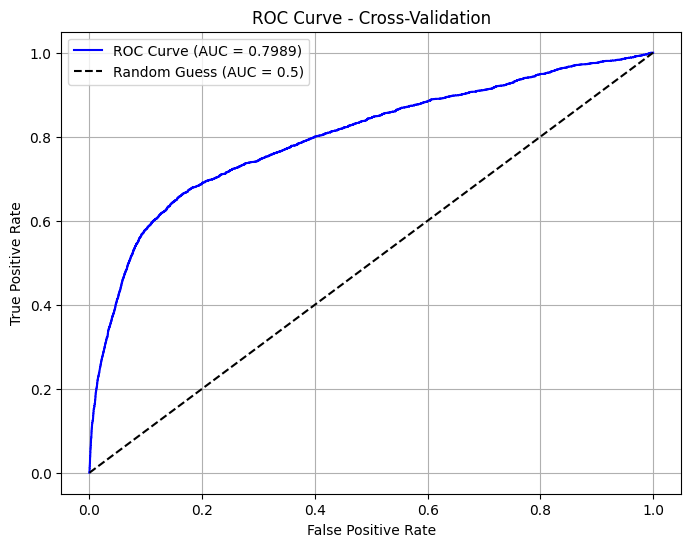

In [ ]:
# Jika ingin scoring juga (opsional)
metric_list = ['accuracy', 'precision', 'roc_auc']
scores = {}
for metric in metric_list:
    metric_score = cross_validate(
        best_pipeline, X, y, cv=kfold, scoring=metric, error_score='raise'
    )
    scores[metric] = metric_score['test_score'].mean()

print("Average CV Scores:")
for m, val in scores.items():
    print(f"{m}: {val:.4f}")

# Predict class & probability menggunakan pipeline
y_pred = cross_val_predict(best_pipeline, X, y, cv=kfold)
y_proba = cross_val_predict(best_pipeline, X, y, cv=kfold, method='predict_proba')[:, 1]

# AUC Score
auc = roc_auc_score(y, y_proba)
print(f"\nAUC Score: {auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_pipeline

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=7,
                                            n_estimators=200, random_state=0,
                                            subsample=0.8))])

In [ ]:
confusion_matrix(y, y_pred)

array([[20020,   282],
       [ 2058,   556]])

# **8 - Feature Importance**

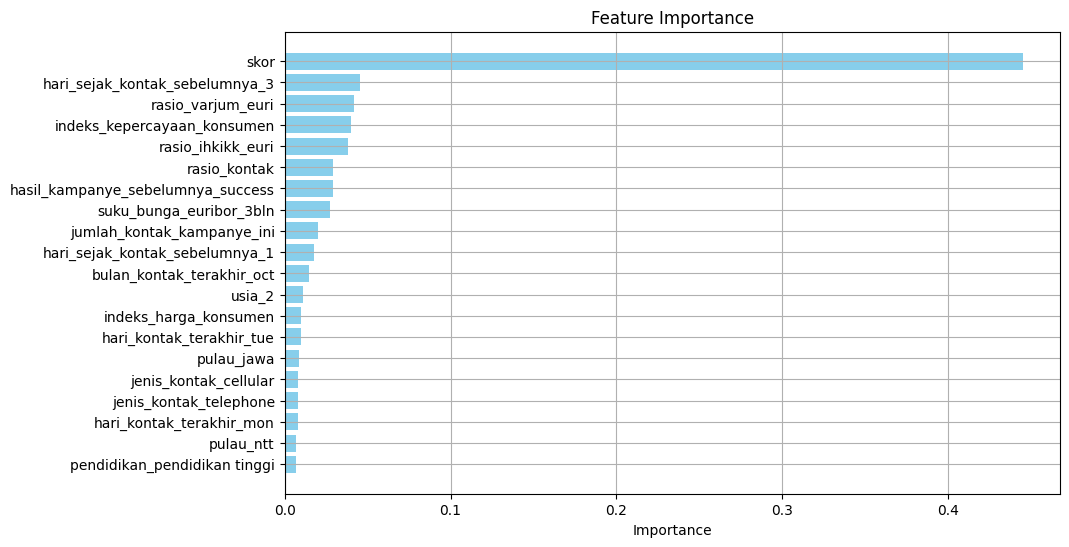

In [ ]:
model = GradientBoostingClassifier(**best_param, random_state=0)
model.fit(X, y)

# Ambil feature importance
importances = model.feature_importances_
feature_names = X.columns

# Buat DataFrame untuk ditampilkan
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(20), importance_df['Importance'].head(20), color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


# **9 - Prediction**

In [ ]:
best_pipeline.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=7,
                                            n_estimators=200, random_state=0,
                                            subsample=0.8))])

In [ ]:
# Prediksi probabilitas
y_proba = best_pipeline.predict_proba(X_test)[:, 1]

In [ ]:
y_proba

array([0.06068556, 0.05027684, 0.04268787, ..., 0.04037478, 0.04708469,
       0.05132204])

In [ ]:
predictions = pd.DataFrame()
predictions['customer_number'] = X_test.index
predictions['berlangganan_deposito'] = y_proba
predictions

,customer_number,berlangganan_deposito
0,445420,0.060686
1,585604,0.050277
2,888824,0.042688
3,816820,0.040397
4,542716,0.061981
...,...,...
5724,782072,0.055056
5725,116371,0.041636
5726,773759,0.040375
5727,612330,0.047085


In [ ]:
predictions.to_csv('gradboost#10_tuning_cv.csv', index=False)